##Binary Classifiers For Depression Detection Using Machine Learning Methods

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Diplomatiki/Dataset_Github_ML_Analysis

/content/drive/MyDrive/Diplomatiki/Dataset_Github_ML_Analysis


In [3]:
from pydoc import help
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from IPython.display import display, HTML
import math
import time

In [4]:
df = pd.read_csv("Depression Dataset.csv")
df

,AGERNG,GENDER,EDU,PROF,MARSTS,RESDPL,LIVWTH,ENVSAT,POSSAT,FINSTR,...,ANXI,DEPRI,ABUSED,CHEAT,THREAT,SUICIDE,INFER,CONFLICT,LOST,DEPRESSED
0,26-30,Female,Post Graduate,Unemployed,Unmarried,Town,With Family,Yes,Yes,No,...,Yes,No,No,No,No,No,No,Yes,No,0
1,26-30,Male,Post Graduate,Service holder (Private),Unmarried,City,With Family,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,Yes,No,No,1
2,21-25,Male,HSC,Student,Unmarried,City,With Family,Yes,Yes,No,...,Yes,Yes,No,No,No,No,No,No,No,0
3,16-20,Male,HSC,Student,Unmarried,City,With Family,No,Yes,No,...,Yes,Yes,No,Yes,No,No,No,No,No,1
4,21-25,Male,Graduate,Student,Unmarried,Town,With Family,No,Yes,Yes,...,Yes,Yes,No,No,No,No,Yes,Yes,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,26-30,Male,Graduate,Service holder (Private),Unmarried,City,With Family,No,Yes,Yes,...,No,Yes,No,No,No,No,No,No,Yes,1
600,26-30,Male,Post Graduate,Service holder (Private),Unmarried,City,With Family,No,No,Yes,...,Yes,Yes,Yes,No,No,No,Yes,No,No,1
601,21-25,Male,Graduate,Student,Married,Village,With Family,No,No,Yes,...,Yes,No,No,No,No,No,No,No,No,1
602,21-25,Male,Graduate,Other,Unmarried,City,With Family,Yes,Yes,No,...,Yes,No,No,No,No,No,Yes,No,No,0


In [5]:
print(df['DEPRESSED'].value_counts())

DEPRESSED
1    397
0    207
Name: count, dtype: int64


In [6]:
print(df.describe())

        DEPRESSED
count  604.000000
mean     0.657285
std      0.475011
min      0.000000
25%      0.000000
50%      1.000000
75%      1.000000
max      1.000000


In [7]:
print(df.isnull().sum().sum())

0


In [8]:
from sklearn.preprocessing import LabelEncoder

feature_names = df.columns.tolist()
#feature_names.remove("AGERNG")
feature_names.remove("DEPRESSED")
label_encoder = LabelEncoder()
encoded_df = df

for feature in feature_names:
  df[feature] = label_encoder.fit_transform(df[feature])
  encoded_df = df

encoded_df

,AGERNG,GENDER,EDU,PROF,MARSTS,RESDPL,LIVWTH,ENVSAT,POSSAT,FINSTR,...,ANXI,DEPRI,ABUSED,CHEAT,THREAT,SUICIDE,INFER,CONFLICT,LOST,DEPRESSED
0,2,0,2,5,2,1,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0
1,2,1,2,3,2,0,0,1,0,1,...,1,1,1,0,0,0,1,0,0,1
2,1,1,1,4,2,0,0,1,1,0,...,1,1,0,0,0,0,0,0,0,0
3,0,1,1,4,2,0,0,0,1,0,...,1,1,0,1,0,0,0,0,0,1
4,1,1,0,4,2,1,0,0,1,1,...,1,1,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,2,1,0,3,2,0,0,0,1,1,...,0,1,0,0,0,0,0,0,1,1
600,2,1,2,3,2,0,0,0,0,1,...,1,1,1,0,0,0,1,0,0,1
601,1,1,0,4,1,2,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
602,1,1,0,1,2,0,0,1,1,0,...,1,0,0,0,0,0,1,0,0,0


In [9]:
from sklearn.metrics import confusion_matrix

def print_confusion_matrix(y_test, y_pred):
  # Assuming y_test and y_pred are your true labels and predicted labels respectively
  conf_matrix = confusion_matrix(y_test, y_pred)

  # Extracting values from confusion matrix
  TN, FP, FN, TP = conf_matrix.ravel()

  print("True Positives:", TP)
  print("True Negatives:", TN)
  print("False Positives:", FP)
  print("False Negatives:", FN)

  return

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def calculate_evaluation_metrics(y_pred, y_test):

  # Calculate accuracy
  accuracy = accuracy_score(y_test, y_pred)
  accuracy *= 100
  print("Accuracy: ", accuracy, "%")

  # Calculate precision
  precision = precision_score(y_test, y_pred)
  precision *= 100
  print("Precision:", precision, "%")

  # Calculate recall (sensitivity)
  recall = recall_score(y_test, y_pred)
  recall *= 100
  print("Recall (Sensitivity):", recall, "%")

  # Calculate specificity
  conf_matrix = confusion_matrix(y_test, y_pred)
  tn, fp, fn, tp = conf_matrix.ravel()
  specificity = tn / (tn + fp)
  specificity *= 100
  print("Specificity:", specificity, "%")

  # Calculate F1-score
  f1 = f1_score(y_test, y_pred)
  f1 *= 100
  print("F1-score:", f1, "%")

  return accuracy, precision, recall, specificity, f1

In [11]:
def plot_execution_time_histogram(execution_times, title='Training Time for Different Feature Selection Algorithms'):
  plt.figure(figsize=(10, 6))  # Adjust figure size if needed
  plt.bar(execution_times.keys(), execution_times.values(), color='green')
  plt.yscale('log')
  plt.xlabel('Feature Selection Algorithms')
  plt.ylabel('Training Time (seconds)')
  plt.title(title)
  plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
  plt.tight_layout()  # Adjust layout to prevent clipping of labels
  plt.show()

  return

In [12]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def draw_ROC_curves(X_test, y_test, models, title_extra=' Without Feature Selection'):

  plt.figure()

  for name, model in models.items():
    if name == "Dense Neural Network Classifier":
      y_pred = model.predict(X_test)
    else:
      y_pred = model.predict_proba(X_test)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='%s (AUC = %0.2f)' % (name, roc_auc))


  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC)' + title_extra)
  plt.legend(loc="lower right", bbox_to_anchor=(1.0, 0.0), fontsize='x-small')
  plt.show()

  return

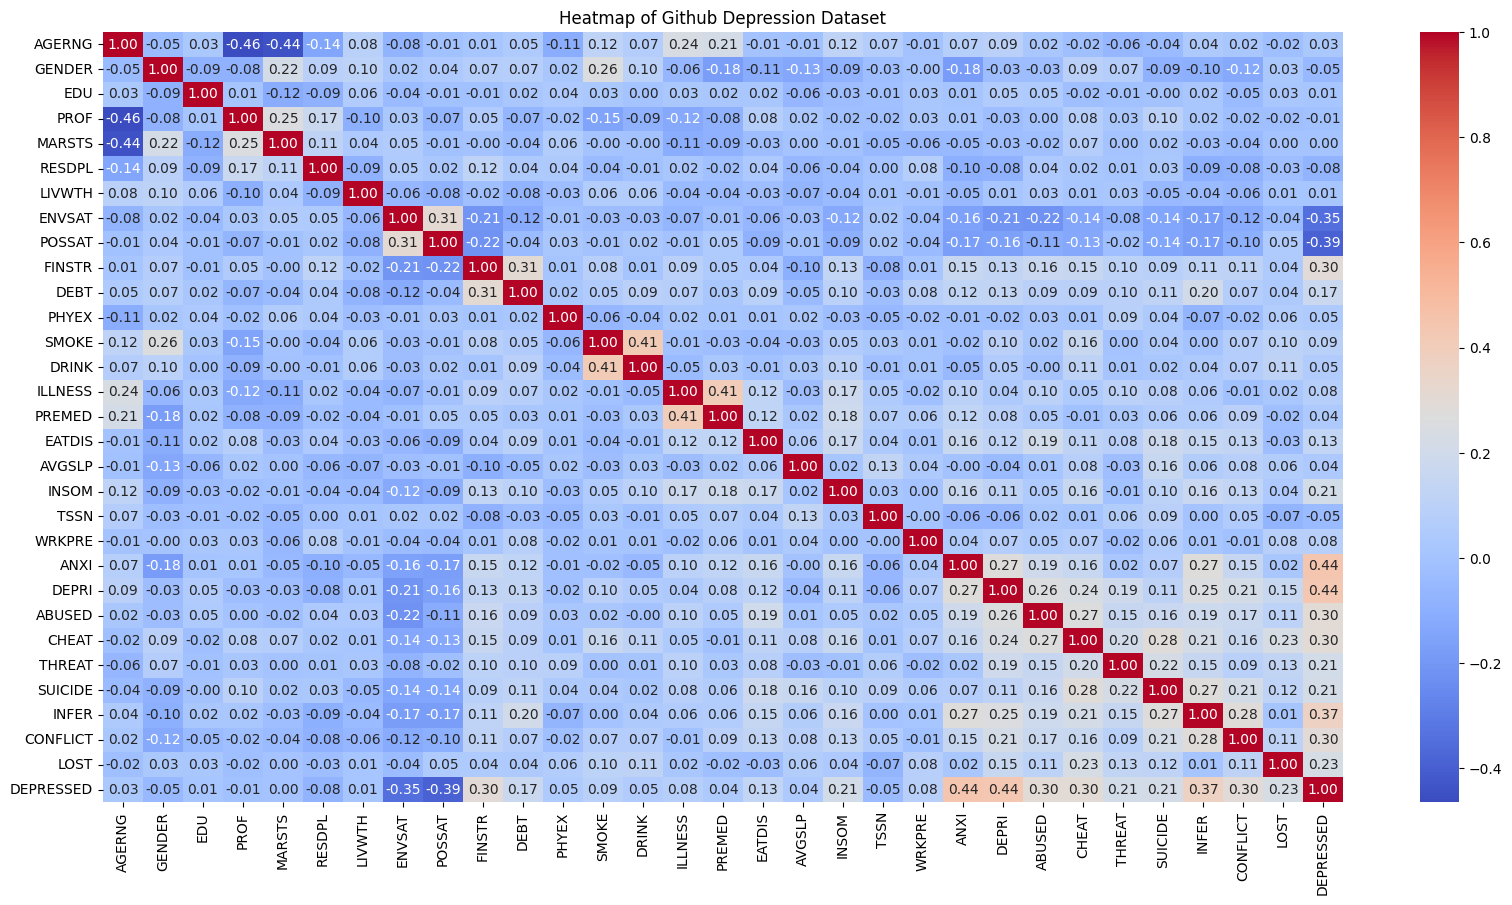

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))

sns.heatmap(encoded_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Github Depression Dataset')
plt.show()

In [14]:
X = encoded_df.drop('DEPRESSED', axis=1)
y = encoded_df['DEPRESSED']

In [15]:
#auto na mpei meta to feature selection

from sklearn.model_selection import train_test_split

X = encoded_df.drop('DEPRESSED', axis=1)
y = encoded_df['DEPRESSED']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

['ENVSAT', 'POSSAT', 'FINSTR', 'DEBT', 'EATDIS', 'INSOM', 'ANXI', 'DEPRI', 'ABUSED', 'CHEAT', 'THREAT', 'SUICIDE', 'INFER', 'CONFLICT', 'LOST']


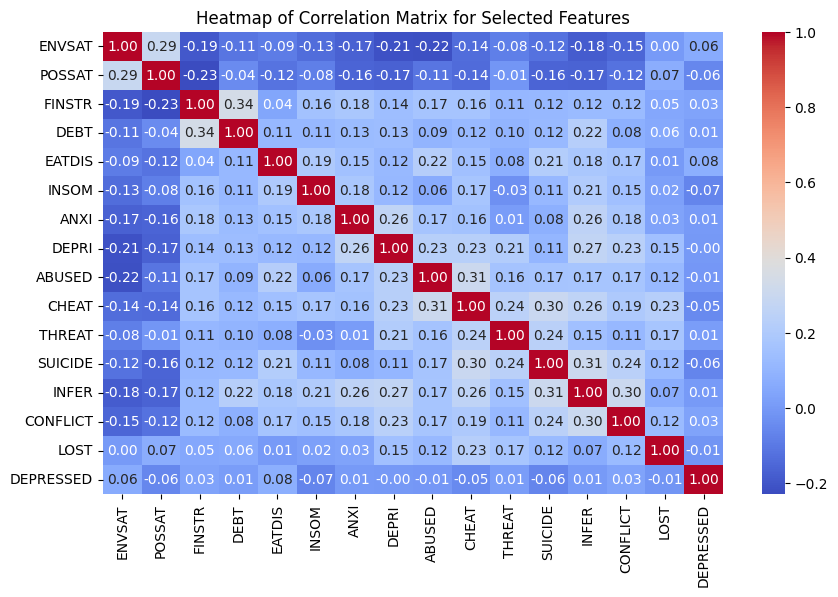

In [16]:
from sklearn.feature_selection import SelectKBest, f_regression

def Select_KBest_Feature_Selection(X_train, y_train, num_features=15):

  selector = SelectKBest(score_func=f_regression, k=num_features)
  X_selected = selector.fit_transform(X_train, y_train)

  #selected_feature_names = X.columns[selector.get_support(indices=True)]
  #print(selected_feature_names)
  selected_feature_names = []
  selected_feature_indices = np.array(selector.get_support(indices=True))
  for index in selected_feature_indices:
    selected_feature_names.append(X_train.columns[index])

  print(selected_feature_names)

  df_KBest= pd.DataFrame(X_selected, columns=selected_feature_names)

  return df_KBest

df_KBest = Select_KBest_Feature_Selection(X_train, y_train, 15)

df_KBest.loc[:, 'DEPRESSED'] = y

plt.figure(figsize=(10, 6))  # Adjust width and height as needed

sns.heatmap(df_KBest.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix for Selected Features')
plt.show()

In [17]:
pip install pymrmr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.5/69.5 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pymrmr: filename=pymrmr-0.1.11-cp310-cp310-linux_x86_64.whl size=390758 sha256=04f0b5eeaa63aedcc5bdb210b0acd366fc273271fd3dc582d6a43e9200da4002
  Stored in directory: /root/.cache/pip/wheels/46/ae/55/4a2479c5f0de7eb363fe970cb18e4a750e03e4e63b1b5c2005
Successfully built pymrmr


     DEPRESSED  AGERNG  GENDER  EDU  PROF  MARSTS  RESDPL  LIVWTH  ENVSAT  \
9            1       1       1    0     4       2       0       0       1   
377          1       0       0    1     4       2       0       0       0   
526          0       1       1    0     4       2       0       0       1   
188          0       2       1    0     3       2       0       0       1   
131          0       2       1    0     0       1       0       0       1   
..         ...     ...     ...  ...   ...     ...     ...     ...     ...   
71           0       1       1    0     4       2       1       0       1   
106          0       0       0    1     4       2       2       0       1   
270          0       2       1    2     5       2       0       0       0   
435          0       1       1    1     4       2       1       0       1   
102          0       1       1    2     4       2       1       1       0   

     POSSAT  ...  WRKPRE  ANXI  DEPRI  ABUSED  CHEAT  THREAT  SUICIDE  INFE

<ipython-input-18-81fb1d53084d>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mRMR.loc[:, 'DEPRESSED'] = y


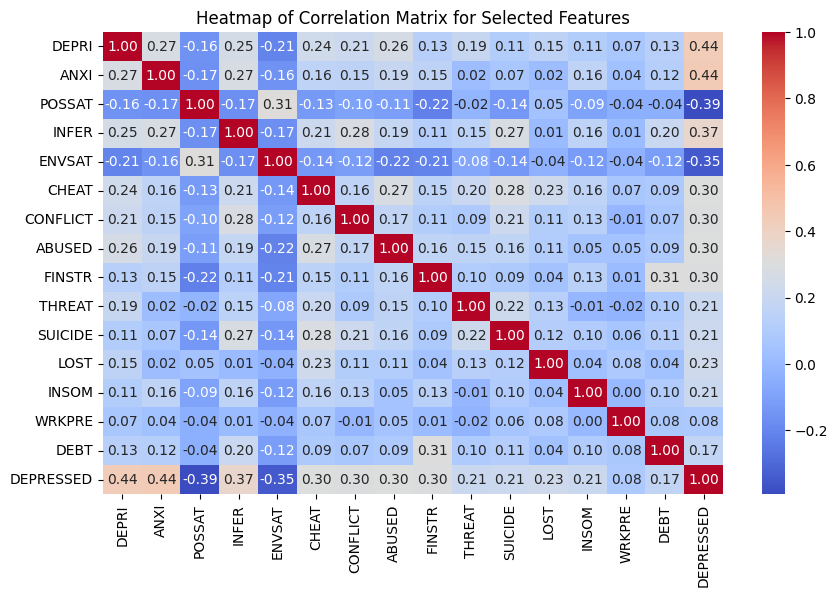

In [18]:
from pymrmr import mRMR

def mRMR_Feature_Selection(X_train, y_train, num_features=15):

  tmp_df = pd.concat([y_train, X_train], axis=1)
  print(tmp_df)


  selected_features_indices = mRMR(tmp_df, 'MID', num_features)  # Change k to select desired number of features

  print(selected_features_indices)

  #selected_features = df.columns[df.columns.isin(selected_features_indices)]

  #print(selected_features)

  #df_mRMR = df[selected_features]
  df_mRMR = encoded_df[selected_features_indices]

  print(df_mRMR)

  return df_mRMR

df_mRMR = mRMR_Feature_Selection(X_train, y_train,15)

df_mRMR.loc[:, 'DEPRESSED'] = y

plt.figure(figsize=(10, 6))

sns.heatmap(df_mRMR.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix for Selected Features')
plt.show()

In [19]:
from sklearn.ensemble import RandomForestClassifier

X_ext = pd.concat([X_train, X_train], axis=1)
#print(X_ext)
#print(X_ext.columns)

#X_shadow = X_ext.apply(np.random.permutation)
X_shadow = X_ext.copy()
for col in X.columns:
    X_shadow[col] = np.random.permutation(X_shadow[col])
#print(X_shadow)

rf = RandomForestClassifier(n_estimators=500, n_jobs=-1, class_weight='balanced')
rf.fit(X_ext, y_train)

importances = rf.feature_importances_

#print("Importances: ",sorted(importances, reverse=True))

shadow_importances = []

rf.fit(X_shadow, y_train)
shadow_importances.append(rf.feature_importances_)

#print(shadow_importances)

MZSA = np.max(shadow_importances)
MeanZSA = np.mean(shadow_importances)
#print("Mean ZSA = ", MeanZSA)
#print("MZSA = ", MZSA)

z_scores = (importances - MeanZSA) / np.std(shadow_importances)
#print("Z Scores = ", z_scores)

selected_features_boruta = []

for i, z_score in zip(X.columns, z_scores):
    if z_score >= MZSA:
        selected_features_boruta.append(i)

#print(selected_features)
#selected_features_boruta = [col for col in selected_features if not col.endswith('_dup')]

print("Selected Features:", selected_features_boruta)

Selected Features: ['ENVSAT', 'POSSAT', 'FINSTR', 'AVGSLP', 'TSSN', 'WRKPRE', 'ANXI', 'DEPRI', 'CHEAT', 'INFER', 'CONFLICT']


<ipython-input-20-0326ac43e823>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_boruta.loc[:, 'DEPRESSED'] = y


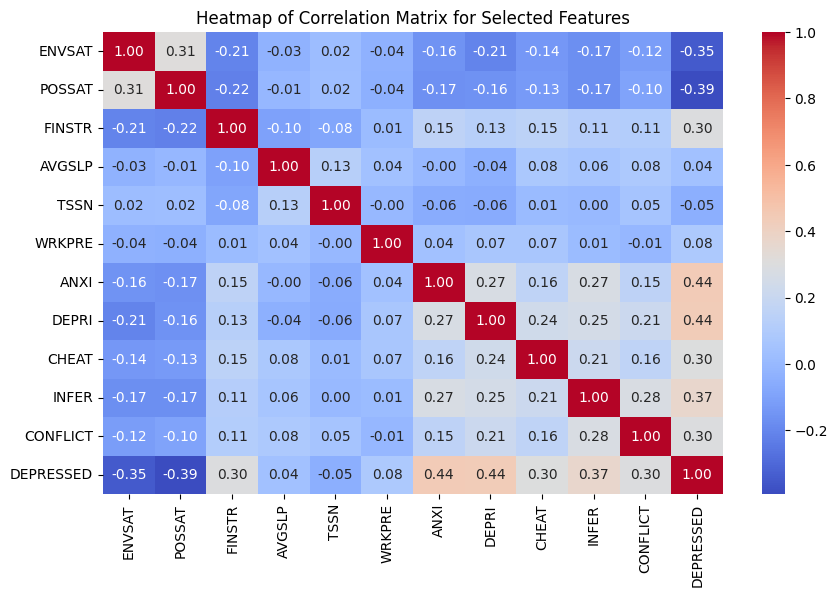

In [20]:
df_boruta = encoded_df[selected_features_boruta]
df_boruta.loc[:, 'DEPRESSED'] = y

plt.figure(figsize=(10, 6))

sns.heatmap(df_boruta.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix for Selected Features')
plt.show()

In [21]:
df_boruta

,ENVSAT,POSSAT,FINSTR,AVGSLP,TSSN,WRKPRE,ANXI,DEPRI,CHEAT,INFER,CONFLICT,DEPRESSED
0,1,1,0,5,0,2,1,0,0,0,1,0
1,1,0,1,1,1,1,1,1,0,1,0,1
2,1,1,0,3,2,0,1,1,0,0,0,0
3,0,1,0,2,0,3,1,1,1,0,0,1
4,0,1,1,2,1,0,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
599,0,1,1,3,2,2,0,1,0,0,0,1
600,0,0,1,2,0,3,1,1,0,1,0,1
601,0,0,1,0,1,0,1,0,0,0,0,1
602,1,1,0,2,0,1,1,0,0,1,0,0


COMPONENTS [[ 5.97405491e-02 -4.06712465e-02 -6.41579743e-02 -1.87501780e-03
  -1.14221852e-02 -2.41961322e-02 -1.36898388e-02 -9.01437787e-03
  -1.21656202e-02 -3.21616995e-02 -1.44458257e-02 -1.68068969e-02
   3.26082329e-03  3.59402384e-03  4.30712647e-03  2.15271883e-02
   2.74721213e-02  7.81502239e-01  1.80237481e-02  6.07422968e-01
   2.73280955e-02  8.83721896e-03 -2.21905061e-02  1.58820528e-02
   2.83582242e-02  4.45140381e-03  4.56975060e-02  2.63047399e-02
   3.89449327e-02  3.87774247e-03]
 [ 1.74378537e-01  1.92135913e-02  3.57872555e-02 -1.18856550e-01
  -4.46047540e-02 -2.42279554e-02  2.85334786e-02  6.88850881e-03
   2.19085617e-02  5.65331137e-03  5.29809301e-03 -9.38545419e-02
   3.86466809e-02  1.13309921e-03  2.35098597e-02  2.19609481e-02
  -5.76438689e-03 -5.96074077e-01  3.94882554e-03  7.57129677e-01
  -7.41978393e-02 -1.98982783e-02 -7.43494540e-04  6.26571679e-03
  -3.09783747e-02  2.27235805e-02 -1.62722156e-02 -6.80676702e-03
   7.24006459e-04 -4.65985127e

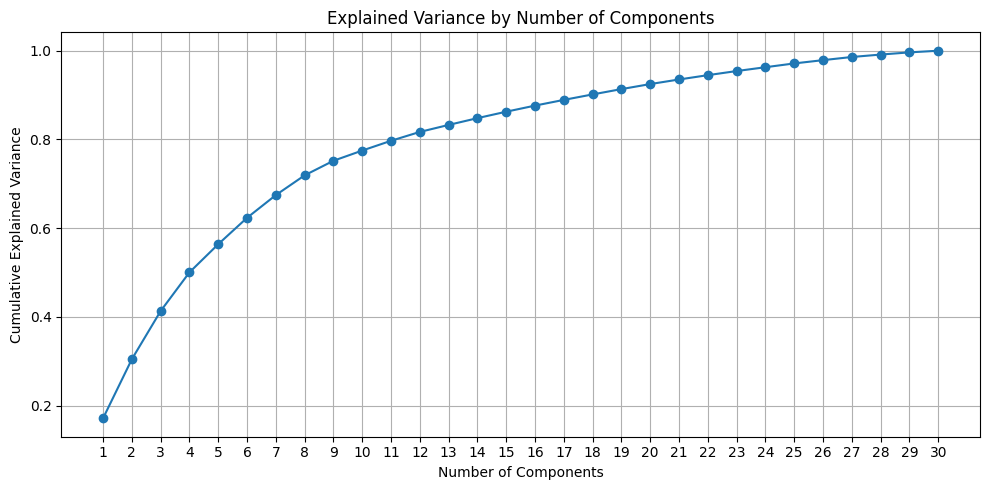

(None,
 array([2.07157797, 1.61116345, 1.31411104, 1.05443221, 0.76753901,
        0.71930856, 0.61978073, 0.5386257 , 0.39689224, 0.27860668,
        0.2663292 , 0.24137593, 0.1907469 , 0.18530434, 0.17542679,
        0.16629384, 0.15549492, 0.14937603, 0.14481877, 0.13721733,
        0.12502343, 0.11782241, 0.11206852, 0.10447882, 0.10323008,
        0.08944831, 0.08611555, 0.06606283, 0.05966291, 0.04535725]),
 array([ True,  True,  True,  True, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]))

In [22]:
from sklearn.decomposition import PCA

# Step 3: Apply PCA to the standardized data without specifying the number of components
pca = PCA()
#pca.fit(X_train)

##########################################################

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

X_pca = pd.concat([X_train, X_test], axis=0)
X_pca.reset_index(drop=True, inplace=True)

df_pca = X_pca
df_pca.loc[:, 'DEPRESSED'] = y

#print("DATA_PCA: ", data_pca, data_pca.shape)

# Create a DataFrame with PCA-transformed data
#df_pca = pd.DataFrame(data_pca, columns=X.columns)

print("COMPONENTS", pca.components_)

# Concatenate original feature labels with transformed data
#df_pca_with_labels = pd.concat([df_pca, pd.DataFrame(X, columns=X.columns)], axis=1)

##########################################################

# Step 4: Use the elbow method to visually inspect the cumulative explained variance plot
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print(np.sum(explained_variance_ratio))

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.grid(True)
plt.xticks(range(1, len(cumulative_explained_variance) + 1))
plt.tight_layout()

# Step 5: Use the Kaiser criterion to select the number of principal components
eigenvalues = pca.explained_variance_
kaiser_criterion = eigenvalues > 1

# Plot the results and output the eigenvalues and Kaiser criterion
plt.show(), eigenvalues, kaiser_criterion

In [23]:
#auto na mpei meta to feature selection

from sklearn.model_selection import train_test_split

X = encoded_df.drop('DEPRESSED', axis=1)
y = encoded_df['DEPRESSED']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

def LogisticRegression_Classification(X_train, X_test, y_train, y_test):

  logistic_model = LogisticRegression()

  start_time = time.time()

  logistic_model.fit(X_train, y_train)

  end_time = time.time()

  duration = end_time - start_time

  y_pred = logistic_model.predict(X_test)

  #accuracy = accuracy_score(y_test, y_pred)
  #print("Accuracy:", accuracy*100)

  accuracy, precision, recall, specificity, f1 = calculate_evaluation_metrics(y_pred, y_test)

  # Additional evaluation metrics
  print(classification_report(y_test, y_pred))

  print_confusion_matrix(y_test, y_pred)

  return accuracy, logistic_model, duration

In [ ]:
logistic_accuracy, logistic_model, logistic_duration_all_features = LogisticRegression_Classification(X_train, X_test, y_train, y_test)

Accuracy:  89.25619834710744 %
Precision: 91.02564102564102 %
Recall (Sensitivity): 92.20779220779221 %
Specificity: 84.0909090909091 %
F1-score: 91.61290322580643 %
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        44
           1       0.91      0.92      0.92        77

    accuracy                           0.89       121
   macro avg       0.89      0.88      0.88       121
weighted avg       0.89      0.89      0.89       121

True Positives: 71
True Negatives: 37
False Positives: 7
False Negatives: 6


In [25]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU
from keras.utils import plot_model

def Neural_Net_Classification(X_train, X_test, y_train, y_test):

  model = Sequential()
  model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
  model.add(Dense(32, activation=LeakyReLU(alpha=0.1)))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.summary()

  plot_model(model, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)

  start_time = time.time()

  h = model.fit(X_train, y_train, epochs=10, batch_size=16, verbose=0)

  end_time = time.time()

  duration = end_time - start_time


  y_pred = model.predict(X_test)

  #print(y_pred)

  binary_predictions = []
  for curr_y in y_pred:
    if curr_y > 0.5:
      binary_predictions.append(1)
    else:
      binary_predictions.append(0)

  y_pred = binary_predictions

  test_loss, test_accuracy = model.evaluate(X_test, y_test)
  #print('Neural Network accuracy:', test_accuracy*100, "%")

  accuracy, precision, recall, specificity, f1 = calculate_evaluation_metrics(y_pred, y_test)

  print(classification_report(y_test, y_pred))

  print_confusion_matrix(y_test, y_pred)

  return test_accuracy, model, duration

In [ ]:
neural_net_accuracy, neural_net_model, neural_net_duration_all_features = Neural_Net_Classification(X_train, X_test, y_train, y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1984      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 4609 (18.00 KB)
Trainable params: 4609 (18.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
4/4 [==============================] - 1s 13ms/step - loss: 0.2595 - accuracy: 0.9008
Accuracy:  90.08264462809917 %
Precision: 91.13924050632912 %
Recall

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

def KNN_Classification(X_train, X_test, y_train, y_test):

  # Create KNN classifier
  k = 1
  knn_classifier = KNeighborsClassifier(n_neighbors=k)

  start_time = time.time()

  # Train the classifier
  knn_classifier.fit(X_train, y_train)

  end_time = time.time()

  duration = end_time - start_time

  y_pred = knn_classifier.predict(X_test)

  #accuracy = accuracy_score(y_test, y_pred)
  #print("Accuracy:", accuracy*100, "%")

  accuracy, precision, recall, specificity, f1 = calculate_evaluation_metrics(y_pred, y_test)

  print(classification_report(y_test, y_pred))

  print_confusion_matrix(y_test, y_pred)

  return accuracy, knn_classifier, duration

In [ ]:
knn_accuracy, knn_classifier, knn_duration_all_features = KNN_Classification(X_train, X_test, y_train, y_test)

Accuracy:  71.900826446281 %
Precision: 89.0909090909091 %
Recall (Sensitivity): 63.63636363636363 %
Specificity: 86.36363636363636 %
F1-score: 74.24242424242424 %
              precision    recall  f1-score   support

           0       0.58      0.86      0.69        44
           1       0.89      0.64      0.74        77

    accuracy                           0.72       121
   macro avg       0.73      0.75      0.72       121
weighted avg       0.78      0.72      0.72       121

True Positives: 49
True Negatives: 38
False Positives: 6
False Negatives: 28


In [27]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

def AdaBoost_Classification(X_train, X_test, y_train, y_test):

  # Create AdaBoost classifier
  adaboost_classifier = AdaBoostClassifier()

  start_time = time.time()

  # Train the classifier
  adaboost_classifier.fit(X_train, y_train)

  end_time = time.time()

  duration = end_time - start_time

  y_pred = adaboost_classifier.predict(X_test)

  #accuracy = accuracy_score(y_test, y_pred)
  #print("Accuracy:", accuracy*100, "%")

  accuracy, precision, recall, specificity, f1 = calculate_evaluation_metrics(y_pred, y_test)

  # Additional metrics
  print(classification_report(y_test, y_pred))

  print_confusion_matrix(y_test, y_pred)

  return accuracy, adaboost_classifier, duration

In [ ]:
adaboost_accuracy, adaboost_classifier, adaboost_duration_all_features = AdaBoost_Classification(X_train, X_test, y_train, y_test)

Accuracy:  90.9090909090909 %
Precision: 91.25 %
Recall (Sensitivity): 94.8051948051948 %
Specificity: 84.0909090909091 %
F1-score: 92.9936305732484 %
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        44
           1       0.91      0.95      0.93        77

    accuracy                           0.91       121
   macro avg       0.91      0.89      0.90       121
weighted avg       0.91      0.91      0.91       121

True Positives: 73
True Negatives: 37
False Positives: 7
False Negatives: 4


In [28]:
from sklearn.ensemble import GradientBoostingClassifier

def GradientBoosting_Classification(X_train, X_test, y_train, y_test):

  # Create Gradient Boosting classifier
  gradient_boosting_classifier = GradientBoostingClassifier()

  start_time = time.time()

  # Train the classifier
  gradient_boosting_classifier.fit(X_train, y_train)

  end_time = time.time()

  duration = end_time - start_time

  y_pred = gradient_boosting_classifier.predict(X_test)

  #accuracy = accuracy_score(y_test, y_pred)
  #print("Accuracy:", accuracy*100, "%")

  accuracy, precision, recall, specificity, f1 = calculate_evaluation_metrics(y_pred, y_test)

  # Additional metrics
  print(classification_report(y_test, y_pred))

  print_confusion_matrix(y_test, y_pred)

  return accuracy, gradient_boosting_classifier, duration

In [ ]:
gradientboosting_accuracy, gradient_boosting_classifier, gradient_boosting_duration_all_features = GradientBoosting_Classification(X_train, X_test, y_train, y_test)

Accuracy:  89.25619834710744 %
Precision: 91.02564102564102 %
Recall (Sensitivity): 92.20779220779221 %
Specificity: 84.0909090909091 %
F1-score: 91.61290322580643 %
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        44
           1       0.91      0.92      0.92        77

    accuracy                           0.89       121
   macro avg       0.89      0.88      0.88       121
weighted avg       0.89      0.89      0.89       121

True Positives: 71
True Negatives: 37
False Positives: 7
False Negatives: 6


In [29]:
import xgboost as xgb

def XGB_Classification(X_train, X_test, y_train, y_test):

  xgb_model = xgb.XGBClassifier()

  start_time = time.time()

  xgb_model.fit(X_train, y_train)

  end_time = time.time()

  duration = end_time - start_time

  y_pred = xgb_model.predict(X_test)

  #accuracy = accuracy_score(y_test, y_pred)
  #print("Accuracy:", accuracy*100, "%")

  accuracy, precision, recall, specificity, f1 = calculate_evaluation_metrics(y_pred, y_test)

  # Additional metrics
  print(classification_report(y_test, y_pred))

  print_confusion_matrix(y_test, y_pred)

  return accuracy, xgb_model, duration

In [ ]:
xgb_accuracy, xgb_model, xgb_duration_all_features = XGB_Classification(X_train, X_test, y_train, y_test)

Accuracy:  87.60330578512396 %
Precision: 89.74358974358975 %
Recall (Sensitivity): 90.9090909090909 %
Specificity: 81.81818181818183 %
F1-score: 90.32258064516128 %
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        44
           1       0.90      0.91      0.90        77

    accuracy                           0.88       121
   macro avg       0.87      0.86      0.87       121
weighted avg       0.88      0.88      0.88       121

True Positives: 70
True Negatives: 36
False Positives: 8
False Negatives: 7


In [30]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

def Bagging_Classification(X_train, X_test, y_train, y_test):

  mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='sgd', max_iter=10000, random_state=42)

  bagging_classifier = BaggingClassifier(estimator=mlp_classifier, n_estimators=10, random_state=42)


  start_time = time.time()

  # Train the model
  bagging_classifier.fit(X_train, y_train)

  end_time = time.time()

  duration = end_time - start_time

  y_pred = bagging_classifier.predict(X_test)

  #accuracy = accuracy_score(y_test, y_pred)
  #print("Accuracy:", accuracy*100, "%")

  accuracy, precision, recall, specificity, f1 = calculate_evaluation_metrics(y_pred, y_test)

  # Additional metrics
  print(classification_report(y_test, y_pred))

  print_confusion_matrix(y_test, y_pred)

  return accuracy, bagging_classifier, duration

In [ ]:
bagging_accuracy, bagging_classifier, bagging_duration_all_features = Bagging_Classification(X_train, X_test, y_train, y_test)

Accuracy:  90.9090909090909 %
Precision: 91.25 %
Recall (Sensitivity): 94.8051948051948 %
Specificity: 84.0909090909091 %
F1-score: 92.9936305732484 %
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        44
           1       0.91      0.95      0.93        77

    accuracy                           0.91       121
   macro avg       0.91      0.89      0.90       121
weighted avg       0.91      0.91      0.91       121

True Positives: 73
True Negatives: 37
False Positives: 7
False Negatives: 4


In [31]:
from sklearn.ensemble import VotingClassifier

def WeightedVoting_Classification(X_train, X_test, y_train, y_test, gradient_boosting_classifier, bagging_classifier, adaboost_classifier):

  # Initialize VotingClassifier with weighted voting
  voting_classifier = VotingClassifier(estimators=[('gradient_boosting', gradient_boosting_classifier), ('Bagging', bagging_classifier),
  ('AdaBoost', adaboost_classifier)], voting='soft')

  start_time = time.time()

  # Fit the model on your training data
  voting_classifier.fit(X_train, y_train)

  end_time = time.time()

  duration = end_time - start_time

  # Make predictions
  y_pred = voting_classifier.predict(X_test)

  #accuracy = accuracy_score(y_test, y_pred)
  #print("Accuracy:", accuracy*100, "%")

  accuracy, precision, recall, specificity, f1 = calculate_evaluation_metrics(y_pred, y_test)

  # Additional metrics
  print(classification_report(y_test, y_pred))

  print_confusion_matrix(y_test, y_pred)

  return accuracy, voting_classifier, duration

In [ ]:
weightedvoting_accuracy, voting_classifier, voting_duration_all_features = WeightedVoting_Classification(X_train, X_test, y_train, y_test,
                                                                           gradient_boosting_classifier, bagging_classifier, adaboost_classifier)

Accuracy:  91.73553719008265 %
Precision: 92.40506329113924 %
Recall (Sensitivity): 94.8051948051948 %
Specificity: 86.36363636363636 %
F1-score: 93.58974358974359 %
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        44
           1       0.92      0.95      0.94        77

    accuracy                           0.92       121
   macro avg       0.91      0.91      0.91       121
weighted avg       0.92      0.92      0.92       121

True Positives: 73
True Negatives: 38
False Positives: 6
False Negatives: 4


4/4 [==============================] - 0s 3ms/step


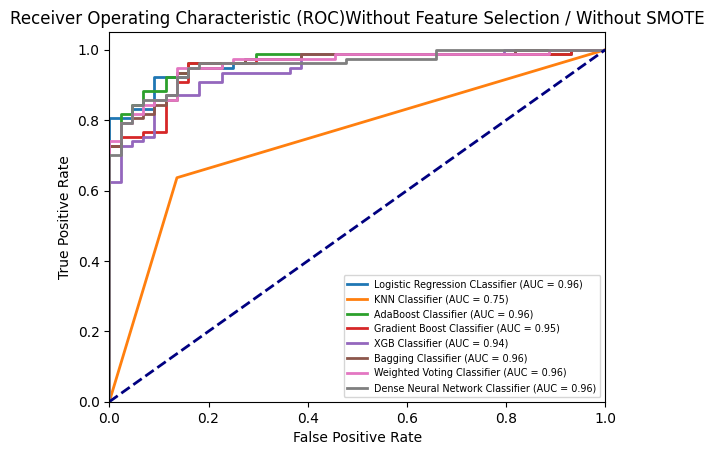

In [ ]:
models = {
    "Logistic Regression CLassifier": logistic_model,
    "KNN Classifier": knn_classifier,
    "AdaBoost Classifier": adaboost_classifier,
    "Gradient Boost Classifier": gradient_boosting_classifier,
    "XGB Classifier": xgb_model,
    "Bagging Classifier": bagging_classifier,
    "Weighted Voting Classifier": voting_classifier,
    "Dense Neural Network Classifier": neural_net_model
}
draw_ROC_curves(X_test, y_test, models, 'Without Feature Selection / Without SMOTE')

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
logistic_accuracy, logistic_model, logistic_duration_all_features_smote = LogisticRegression_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  91.73553719008265 %
Precision: 95.8904109589041 %
Recall (Sensitivity): 90.9090909090909 %
Specificity: 93.18181818181817 %
F1-score: 93.33333333333333 %
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        44
           1       0.96      0.91      0.93        77

    accuracy                           0.92       121
   macro avg       0.91      0.92      0.91       121
weighted avg       0.92      0.92      0.92       121

True Positives: 70
True Negatives: 41
False Positives: 3
False Negatives: 7


In [ ]:
knn_accuracy_smote, knn_classifier_smote, knn_duration_all_features_smote = KNN_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  72.72727272727273 %
Precision: 92.3076923076923 %
Recall (Sensitivity): 62.33766233766234 %
Specificity: 90.9090909090909 %
F1-score: 74.4186046511628 %
              precision    recall  f1-score   support

           0       0.58      0.91      0.71        44
           1       0.92      0.62      0.74        77

    accuracy                           0.73       121
   macro avg       0.75      0.77      0.73       121
weighted avg       0.80      0.73      0.73       121

True Positives: 48
True Negatives: 40
False Positives: 4
False Negatives: 29


In [ ]:
adaboost_accuracy, adaboost_classifier, adaboost_duration_all_features_smote = AdaBoost_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  90.08264462809917 %
Precision: 92.20779220779221 %
Recall (Sensitivity): 92.20779220779221 %
Specificity: 86.36363636363636 %
F1-score: 92.20779220779221 %
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        44
           1       0.92      0.92      0.92        77

    accuracy                           0.90       121
   macro avg       0.89      0.89      0.89       121
weighted avg       0.90      0.90      0.90       121

True Positives: 71
True Negatives: 38
False Positives: 6
False Negatives: 6


In [ ]:
gradientboosting_accuracy, gradient_boosting_classifier, gradient_boosting_duration_all_features_smote = GradientBoosting_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  89.25619834710744 %
Precision: 94.44444444444444 %
Recall (Sensitivity): 88.31168831168831 %
Specificity: 90.9090909090909 %
F1-score: 91.2751677852349 %
              precision    recall  f1-score   support

           0       0.82      0.91      0.86        44
           1       0.94      0.88      0.91        77

    accuracy                           0.89       121
   macro avg       0.88      0.90      0.89       121
weighted avg       0.90      0.89      0.89       121

True Positives: 68
True Negatives: 40
False Positives: 4
False Negatives: 9


In [ ]:
xgb_accuracy, xgb_model, xgb_duration_all_features_smote = XGB_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  86.77685950413223 %
Precision: 91.78082191780823 %
Recall (Sensitivity): 87.01298701298701 %
Specificity: 86.36363636363636 %
F1-score: 89.33333333333333 %
              precision    recall  f1-score   support

           0       0.79      0.86      0.83        44
           1       0.92      0.87      0.89        77

    accuracy                           0.87       121
   macro avg       0.85      0.87      0.86       121
weighted avg       0.87      0.87      0.87       121

True Positives: 67
True Negatives: 38
False Positives: 6
False Negatives: 10


In [ ]:
bagging_accuracy, bagging_classifier, bagging_duration_all_features_smote = Bagging_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  89.25619834710744 %
Precision: 92.10526315789474 %
Recall (Sensitivity): 90.9090909090909 %
Specificity: 86.36363636363636 %
F1-score: 91.5032679738562 %
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        44
           1       0.92      0.91      0.92        77

    accuracy                           0.89       121
   macro avg       0.88      0.89      0.88       121
weighted avg       0.89      0.89      0.89       121

True Positives: 70
True Negatives: 38
False Positives: 6
False Negatives: 7


In [ ]:
weightedvoting_accuracy, voting_classifier, voting_duration_all_features_smote = WeightedVoting_Classification(X_train_resampled, X_test, y_train_resampled, y_test,
                                                                           gradient_boosting_classifier, bagging_classifier, adaboost_classifier)

Accuracy:  90.08264462809917 %
Precision: 93.33333333333333 %
Recall (Sensitivity): 90.9090909090909 %
Specificity: 88.63636363636364 %
F1-score: 92.10526315789474 %
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        44
           1       0.93      0.91      0.92        77

    accuracy                           0.90       121
   macro avg       0.89      0.90      0.89       121
weighted avg       0.90      0.90      0.90       121

True Positives: 70
True Negatives: 39
False Positives: 5
False Negatives: 7


In [ ]:
neural_net_accuracy, neural_net_model, neural_net_duration_all_features_smote = Neural_Net_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                1984      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 4609 (18.00 KB)
Trainable params: 4609 (18.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
4/4 [==============================] - 0s 5ms/step - loss: 0.3074 - accuracy: 0.8678
Accuracy:  86.77685950413223 %
Precision: 94.20289855072464 %
Recal

4/4 [==============================] - 0s 4ms/step


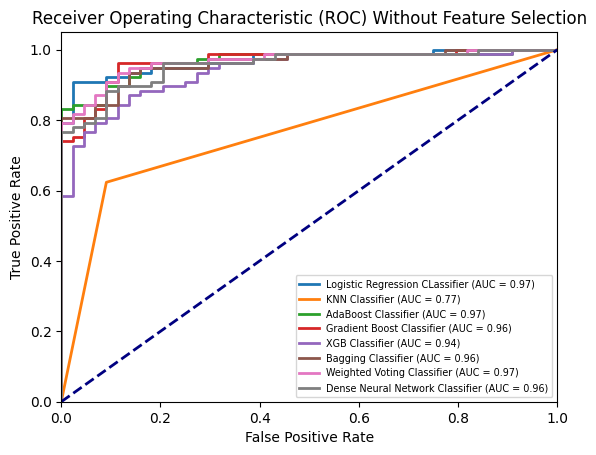

In [ ]:
models = {
    "Logistic Regression CLassifier": logistic_model,
    "KNN Classifier": knn_classifier_smote,
    "AdaBoost Classifier": adaboost_classifier,
    "Gradient Boost Classifier": gradient_boosting_classifier,
    "XGB Classifier": xgb_model,
    "Bagging Classifier": bagging_classifier,
    "Weighted Voting Classifier": voting_classifier,
    "Dense Neural Network Classifier": neural_net_model
}
draw_ROC_curves(X_test, y_test, models)

In [33]:
df_KBest.loc[:, 'DEPRESSED'] = y
X = encoded_df[df_KBest.columns].drop('DEPRESSED', axis=1)
y = encoded_df['DEPRESSED']
df_KBest = encoded_df[df_KBest.columns]
df_KBest

,ENVSAT,POSSAT,FINSTR,DEBT,EATDIS,INSOM,ANXI,DEPRI,ABUSED,CHEAT,THREAT,SUICIDE,INFER,CONFLICT,LOST,DEPRESSED
0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,1,0,1,0,0,1,1,1,1,0,0,0,1,0,0,1
2,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1
4,0,1,1,0,0,1,1,1,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,1
600,0,0,1,1,0,0,1,1,1,0,0,0,1,0,0,1
601,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
602,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [34]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

smote = SMOTE(random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("RESULTS AFTER DIMENSIONALITY REDUCTION WITH SELECT KBEST")

RESULTS AFTER DIMENSIONALITY REDUCTION WITH SELECT KBEST


In [35]:
logistic_accuracy, logistic_model, logistic_duration_kbest = LogisticRegression_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  90.9090909090909 %
Precision: 98.52941176470588 %
Recall (Sensitivity): 87.01298701298701 %
Specificity: 97.72727272727273 %
F1-score: 92.41379310344827 %
              precision    recall  f1-score   support

           0       0.81      0.98      0.89        44
           1       0.99      0.87      0.92        77

    accuracy                           0.91       121
   macro avg       0.90      0.92      0.91       121
weighted avg       0.92      0.91      0.91       121

True Positives: 67
True Negatives: 43
False Positives: 1
False Negatives: 10


In [36]:
knn_accuracy_smote, knn_classifier_smote, knn_duration_kbest = KNN_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  83.47107438016529 %
Precision: 91.30434782608695 %
Recall (Sensitivity): 81.81818181818183 %
Specificity: 86.36363636363636 %
F1-score: 86.3013698630137 %
              precision    recall  f1-score   support

           0       0.73      0.86      0.79        44
           1       0.91      0.82      0.86        77

    accuracy                           0.83       121
   macro avg       0.82      0.84      0.83       121
weighted avg       0.85      0.83      0.84       121

True Positives: 63
True Negatives: 38
False Positives: 6
False Negatives: 14


In [37]:
adaboost_accuracy, adaboost_classifier, adaboost_duration_kbest = AdaBoost_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy:  90.9090909090909 %
Precision: 98.52941176470588 %
Recall (Sensitivity): 87.01298701298701 %
Specificity: 97.72727272727273 %
F1-score: 92.41379310344827 %
              precision    recall  f1-score   support

           0       0.81      0.98      0.89        44
           1       0.99      0.87      0.92        77

    accuracy                           0.91       121
   macro avg       0.90      0.92      0.91       121
weighted avg       0.92      0.91      0.91       121

True Positives: 67
True Negatives: 43
False Positives: 1
False Negatives: 10


In [38]:
gradientboosting_accuracy, gradient_boosting_classifier, gradient_boosting_duration_kbest = GradientBoosting_Classification(X_train_resampled, X_test,
                                                                                                                            y_train_resampled, y_test)

Accuracy:  86.77685950413223 %
Precision: 96.92307692307692 %
Recall (Sensitivity): 81.81818181818183 %
Specificity: 95.45454545454545 %
F1-score: 88.73239436619718 %
              precision    recall  f1-score   support

           0       0.75      0.95      0.84        44
           1       0.97      0.82      0.89        77

    accuracy                           0.87       121
   macro avg       0.86      0.89      0.86       121
weighted avg       0.89      0.87      0.87       121

True Positives: 63
True Negatives: 42
False Positives: 2
False Negatives: 14


In [39]:
xgb_accuracy, xgb_model, xgb_duration_kbest = XGB_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  86.77685950413223 %
Precision: 92.95774647887323 %
Recall (Sensitivity): 85.71428571428571 %
Specificity: 88.63636363636364 %
F1-score: 89.1891891891892 %
              precision    recall  f1-score   support

           0       0.78      0.89      0.83        44
           1       0.93      0.86      0.89        77

    accuracy                           0.87       121
   macro avg       0.85      0.87      0.86       121
weighted avg       0.88      0.87      0.87       121

True Positives: 66
True Negatives: 39
False Positives: 5
False Negatives: 11


In [40]:
bagging_accuracy, bagging_classifier, bagging_duration_kbest = Bagging_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  90.08264462809917 %
Precision: 97.10144927536231 %
Recall (Sensitivity): 87.01298701298701 %
Specificity: 95.45454545454545 %
F1-score: 91.78082191780823 %
              precision    recall  f1-score   support

           0       0.81      0.95      0.88        44
           1       0.97      0.87      0.92        77

    accuracy                           0.90       121
   macro avg       0.89      0.91      0.90       121
weighted avg       0.91      0.90      0.90       121

True Positives: 67
True Negatives: 42
False Positives: 2
False Negatives: 10


In [41]:
weightedvoting_accuracy, voting_classifier, voting_duration_kbest = WeightedVoting_Classification(X_train_resampled, X_test, y_train_resampled, y_test,
                                                                           gradient_boosting_classifier, bagging_classifier, adaboost_classifier)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy:  89.25619834710744 %
Precision: 97.05882352941177 %
Recall (Sensitivity): 85.71428571428571 %
Specificity: 95.45454545454545 %
F1-score: 91.0344827586207 %
              precision    recall  f1-score   support

           0       0.79      0.95      0.87        44
           1       0.97      0.86      0.91        77

    accuracy                           0.89       121
   macro avg       0.88      0.91      0.89       121
weighted avg       0.91      0.89      0.89       121

True Positives: 66
True Negatives: 42
False Positives: 2
False Negatives: 11


In [42]:
neural_net_accuracy, neural_net_model, neural_net_duration_kbest = Neural_Net_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,649 (14.25 KB)

 Trainable params: 3,649 (14.25 KB)

 Non-trainable params: 0 (0.00 B)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8991 - loss: 0.2484  
Accuracy:  90.9090909090909 %
Precision: 97.14285714285714 %
Recall (Sensitivity): 88.31168831168831 %
Specificity: 95.45454545454545 %
F1-score: 92.51700680272108 %
              precision    recall  f1-score   support

           0       0.82      0.95      0.88        44
           1       0.97      0.88      0.93        77

    accuracy                           0.91       121
   macro avg       0.90      0.92      0.90       121
weighted avg       0.92      0.91      0.91       121

True Positives: 68
True Negatives: 42
False Positives: 2
False Negatives: 9


4/4 [==============================] - 0s 3ms/step


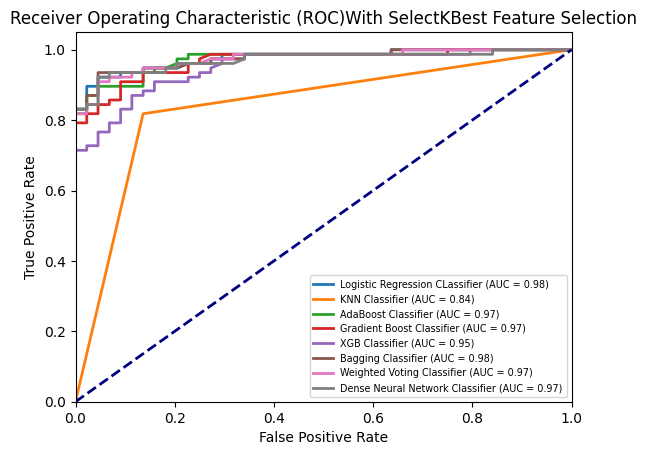

In [ ]:
models = {
    "Logistic Regression CLassifier": logistic_model,
    "KNN Classifier": knn_classifier_smote,
    "AdaBoost Classifier": adaboost_classifier,
    "Gradient Boost Classifier": gradient_boosting_classifier,
    "XGB Classifier": xgb_model,
    "Bagging Classifier": bagging_classifier,
    "Weighted Voting Classifier": voting_classifier,
    "Dense Neural Network Classifier": neural_net_model
}
draw_ROC_curves(X_test, y_test, models, 'With SelectKBest Feature Selection')

In [ ]:
df_mRMR.loc[:, 'DEPRESSED'] = y
X = encoded_df[df_mRMR.columns].drop('DEPRESSED', axis=1)
y = encoded_df['DEPRESSED']
df_mRMR = encoded_df[df_mRMR.columns]
df_mRMR

,DEPRI,ANXI,POSSAT,INFER,ENVSAT,CHEAT,CONFLICT,ABUSED,FINSTR,THREAT,SUICIDE,LOST,INSOM,WRKPRE,DEBT,DEPRESSED
0,0,1,1,0,1,0,1,0,0,0,0,0,0,2,0,0
1,1,1,0,1,1,0,0,1,1,0,0,0,1,1,0,1
2,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,1,0,0,0,0,0,0,0,3,0,1
4,1,1,1,1,0,0,1,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,1,0,1,0,0,0,0,0,1,0,0,1,1,2,0,1
600,1,1,0,1,0,0,0,1,1,0,0,0,0,3,1,1
601,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
602,0,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

smote = SMOTE(random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("RESULTS AFTER DIMENSIONALITY REDUCTION WITH mMRM")

RESULTS AFTER DIMENSIONALITY REDUCTION WITH mMRM


In [ ]:
logistic_accuracy, logistic_model, logistic_duration_mRMR = LogisticRegression_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  91.73553719008265 %
Precision: 98.55072463768117 %
Recall (Sensitivity): 88.31168831168831 %
Specificity: 97.72727272727273 %
F1-score: 93.15068493150685 %
              precision    recall  f1-score   support

           0       0.83      0.98      0.90        44
           1       0.99      0.88      0.93        77

    accuracy                           0.92       121
   macro avg       0.91      0.93      0.91       121
weighted avg       0.93      0.92      0.92       121

True Positives: 68
True Negatives: 43
False Positives: 1
False Negatives: 9


In [ ]:
knn_accuracy_smote, knn_classifier_smote, knn_duration_mRMR = KNN_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  77.68595041322314 %
Precision: 87.87878787878788 %
Recall (Sensitivity): 75.32467532467533 %
Specificity: 81.81818181818183 %
F1-score: 81.11888111888112 %
              precision    recall  f1-score   support

           0       0.65      0.82      0.73        44
           1       0.88      0.75      0.81        77

    accuracy                           0.78       121
   macro avg       0.77      0.79      0.77       121
weighted avg       0.80      0.78      0.78       121

True Positives: 58
True Negatives: 36
False Positives: 8
False Negatives: 19


In [ ]:
adaboost_accuracy, adaboost_classifier, adaboost_duration_mRMR = AdaBoost_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  90.08264462809917 %
Precision: 97.10144927536231 %
Recall (Sensitivity): 87.01298701298701 %
Specificity: 95.45454545454545 %
F1-score: 91.78082191780821 %
              precision    recall  f1-score   support

           0       0.81      0.95      0.88        44
           1       0.97      0.87      0.92        77

    accuracy                           0.90       121
   macro avg       0.89      0.91      0.90       121
weighted avg       0.91      0.90      0.90       121

True Positives: 67
True Negatives: 42
False Positives: 2
False Negatives: 10


In [ ]:
gradientboosting_accuracy, gradient_boosting_classifier, gradient_boosting_duration_mRMR = GradientBoosting_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  85.9504132231405 %
Precision: 94.11764705882352 %
Recall (Sensitivity): 83.11688311688312 %
Specificity: 90.9090909090909 %
F1-score: 88.27586206896552 %
              precision    recall  f1-score   support

           0       0.75      0.91      0.82        44
           1       0.94      0.83      0.88        77

    accuracy                           0.86       121
   macro avg       0.85      0.87      0.85       121
weighted avg       0.87      0.86      0.86       121

True Positives: 64
True Negatives: 40
False Positives: 4
False Negatives: 13


In [ ]:
xgb_accuracy, xgb_model, xgb_duration_mRMR = XGB_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  83.47107438016529 %
Precision: 90.14084507042254 %
Recall (Sensitivity): 83.11688311688312 %
Specificity: 84.0909090909091 %
F1-score: 86.4864864864865 %
              precision    recall  f1-score   support

           0       0.74      0.84      0.79        44
           1       0.90      0.83      0.86        77

    accuracy                           0.83       121
   macro avg       0.82      0.84      0.83       121
weighted avg       0.84      0.83      0.84       121

True Positives: 64
True Negatives: 37
False Positives: 7
False Negatives: 13


In [ ]:
bagging_accuracy, bagging_classifier, bagging_duration_mRMR = Bagging_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  89.25619834710744 %
Precision: 97.05882352941177 %
Recall (Sensitivity): 85.71428571428571 %
Specificity: 95.45454545454545 %
F1-score: 91.03448275862068 %
              precision    recall  f1-score   support

           0       0.79      0.95      0.87        44
           1       0.97      0.86      0.91        77

    accuracy                           0.89       121
   macro avg       0.88      0.91      0.89       121
weighted avg       0.91      0.89      0.89       121

True Positives: 66
True Negatives: 42
False Positives: 2
False Negatives: 11


In [ ]:
weightedvoting_accuracy, voting_classifier, voting_duration_mRMR = WeightedVoting_Classification(X_train_resampled, X_test, y_train_resampled, y_test,
                                                                           gradient_boosting_classifier, bagging_classifier, adaboost_classifier)

Accuracy:  90.08264462809917 %
Precision: 97.10144927536231 %
Recall (Sensitivity): 87.01298701298701 %
Specificity: 95.45454545454545 %
F1-score: 91.78082191780821 %
              precision    recall  f1-score   support

           0       0.81      0.95      0.88        44
           1       0.97      0.87      0.92        77

    accuracy                           0.90       121
   macro avg       0.89      0.91      0.90       121
weighted avg       0.91      0.90      0.90       121

True Positives: 67
True Negatives: 42
False Positives: 2
False Negatives: 10


In [ ]:
neural_net_accuracy, neural_net_model, neural_net_duration_mRMR = Neural_Net_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 64)                  │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,649 (14.25 KB)

 Trainable params: 3,649 (14.25 KB)

 Non-trainable params: 0 (0.00 B)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9107 - loss: 0.2525  
Accuracy:  91.73553719008265 %
Precision: 97.1830985915493 %
Recall (Sensitivity): 89.6103896103896 %
Specificity: 95.45454545454545 %
F1-score: 93.24324324324324 %
              precision    recall  f1-score   support

           0       0.84      0.95      0.89        44
           1       0.97      0.90      0.93        77

    accuracy                           0.92       121
   macro avg       0.91      0.93      0.91       121
weighted avg       0.92      0.92      0.92       121

True Positives: 69
True Negatives: 42
False Positives: 2
False Negatives: 8


4/4 [==============================] - 0s 3ms/step


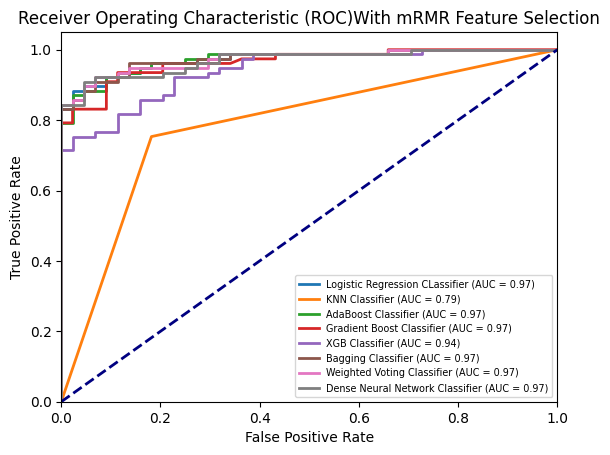

In [ ]:
models = {
    "Logistic Regression CLassifier": logistic_model,
    "KNN Classifier": knn_classifier_smote,
    "AdaBoost Classifier": adaboost_classifier,
    "Gradient Boost Classifier": gradient_boosting_classifier,
    "XGB Classifier": xgb_model,
    "Bagging Classifier": bagging_classifier,
    "Weighted Voting Classifier": voting_classifier,
    "Dense Neural Network Classifier": neural_net_model
}
draw_ROC_curves(X_test, y_test, models, 'With mRMR Feature Selection')

In [ ]:
df_boruta.loc[:, 'DEPRESSED'] = y
X = encoded_df[df_boruta.columns].drop('DEPRESSED', axis=1)
y = encoded_df['DEPRESSED']
df_boruta = encoded_df[df_boruta.columns]
df_boruta

,ENVSAT,POSSAT,FINSTR,AVGSLP,TSSN,WRKPRE,ANXI,DEPRI,CHEAT,INFER,DEPRESSED
0,1,1,0,5,0,2,1,0,0,0,0
1,1,0,1,1,1,1,1,1,0,1,1
2,1,1,0,3,2,0,1,1,0,0,0
3,0,1,0,2,0,3,1,1,1,0,1
4,0,1,1,2,1,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
599,0,1,1,3,2,2,0,1,0,0,1
600,0,0,1,2,0,3,1,1,0,1,1
601,0,0,1,0,1,0,1,0,0,0,1
602,1,1,0,2,0,1,1,0,0,1,0


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

smote = SMOTE(random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("RESULTS AFTER DIMENSIONALITY REDUCTION WITH BORUTA")

RESULTS AFTER DIMENSIONALITY REDUCTION WITH BORUTA


In [ ]:
logistic_accuracy, logistic_model, logistic_duration_boruta = LogisticRegression_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  85.9504132231405 %
Precision: 94.11764705882352 %
Recall (Sensitivity): 83.11688311688312 %
Specificity: 90.9090909090909 %
F1-score: 88.27586206896552 %
              precision    recall  f1-score   support

           0       0.75      0.91      0.82        44
           1       0.94      0.83      0.88        77

    accuracy                           0.86       121
   macro avg       0.85      0.87      0.85       121
weighted avg       0.87      0.86      0.86       121

True Positives: 64
True Negatives: 40
False Positives: 4
False Negatives: 13


In [ ]:
knn_accuracy_smote, knn_classifier_smote, knn_duration_boruta = KNN_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  70.24793388429752 %
Precision: 80.59701492537313 %
Recall (Sensitivity): 70.12987012987013 %
Specificity: 70.45454545454545 %
F1-score: 75.0 %
              precision    recall  f1-score   support

           0       0.57      0.70      0.63        44
           1       0.81      0.70      0.75        77

    accuracy                           0.70       121
   macro avg       0.69      0.70      0.69       121
weighted avg       0.72      0.70      0.71       121

True Positives: 54
True Negatives: 31
False Positives: 13
False Negatives: 23


In [ ]:
adaboost_accuracy, adaboost_classifier, adaboost_duration_boruta = AdaBoost_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  82.64462809917356 %
Precision: 90.0 %
Recall (Sensitivity): 81.81818181818183 %
Specificity: 84.0909090909091 %
F1-score: 85.71428571428572 %
              precision    recall  f1-score   support

           0       0.73      0.84      0.78        44
           1       0.90      0.82      0.86        77

    accuracy                           0.83       121
   macro avg       0.81      0.83      0.82       121
weighted avg       0.84      0.83      0.83       121

True Positives: 63
True Negatives: 37
False Positives: 7
False Negatives: 14


In [ ]:
gradientboosting_accuracy, gradient_boosting_classifier, gradient_boosting_duration_boruta = GradientBoosting_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  82.64462809917356 %
Precision: 88.88888888888889 %
Recall (Sensitivity): 83.11688311688312 %
Specificity: 81.81818181818183 %
F1-score: 85.90604026845638 %
              precision    recall  f1-score   support

           0       0.73      0.82      0.77        44
           1       0.89      0.83      0.86        77

    accuracy                           0.83       121
   macro avg       0.81      0.82      0.82       121
weighted avg       0.83      0.83      0.83       121

True Positives: 64
True Negatives: 36
False Positives: 8
False Negatives: 13


In [ ]:
xgb_accuracy, xgb_model, xgb_duration_boruta = XGB_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  77.68595041322314 %
Precision: 87.87878787878788 %
Recall (Sensitivity): 75.32467532467533 %
Specificity: 81.81818181818183 %
F1-score: 81.11888111888112 %
              precision    recall  f1-score   support

           0       0.65      0.82      0.73        44
           1       0.88      0.75      0.81        77

    accuracy                           0.78       121
   macro avg       0.77      0.79      0.77       121
weighted avg       0.80      0.78      0.78       121

True Positives: 58
True Negatives: 36
False Positives: 8
False Negatives: 19


In [ ]:
bagging_accuracy, bagging_classifier, bagging_duration_boruta = Bagging_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  85.12396694214877 %
Precision: 94.02985074626866 %
Recall (Sensitivity): 81.81818181818183 %
Specificity: 90.9090909090909 %
F1-score: 87.50000000000001 %
              precision    recall  f1-score   support

           0       0.74      0.91      0.82        44
           1       0.94      0.82      0.88        77

    accuracy                           0.85       121
   macro avg       0.84      0.86      0.85       121
weighted avg       0.87      0.85      0.85       121

True Positives: 63
True Negatives: 40
False Positives: 4
False Negatives: 14


In [ ]:
weightedvoting_accuracy, voting_classifier, voting_duration_boruta = WeightedVoting_Classification(X_train_resampled, X_test, y_train_resampled, y_test,
                                                                           gradient_boosting_classifier, bagging_classifier, adaboost_classifier)

Accuracy:  86.77685950413223 %
Precision: 92.95774647887323 %
Recall (Sensitivity): 85.71428571428571 %
Specificity: 88.63636363636364 %
F1-score: 89.18918918918918 %
              precision    recall  f1-score   support

           0       0.78      0.89      0.83        44
           1       0.93      0.86      0.89        77

    accuracy                           0.87       121
   macro avg       0.85      0.87      0.86       121
weighted avg       0.88      0.87      0.87       121

True Positives: 66
True Negatives: 39
False Positives: 5
False Negatives: 11


In [ ]:
neural_net_accuracy, neural_net_model, neural_net_duration_boruta = Neural_Net_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8290 - loss: 0.4403  
Accuracy:  85.12396694214877 %
Precision: 94.02985074626866 %
Recall (Sensitivity): 81.81818181818183 %
Specificity: 90.9090909090909 %
F1-score: 87.50000000000001 %
              precision    recall  f1-score   support

           0       0.74      0.91      0.82        44
           1       0.94      0.82      0.88        77

    accuracy                           0.85       121
   macro avg       0.84      0.86      0.85       121
weighted avg       0.87      0.85      0.85       121

True Positives: 63
True Negatives: 40
False Positives: 4
False Negatives: 14


4/4 [==============================] - 0s 3ms/step


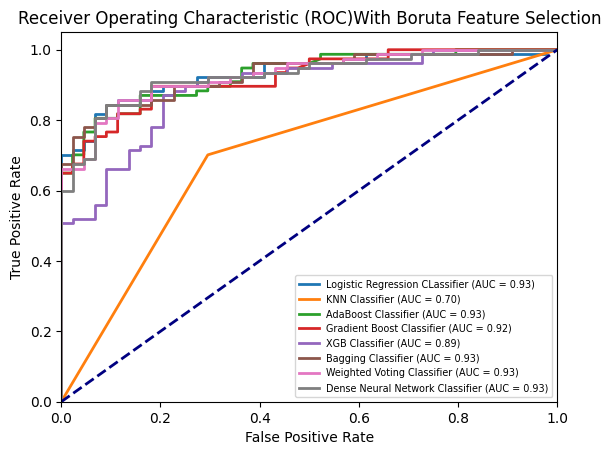

In [ ]:
models = {
    "Logistic Regression CLassifier": logistic_model,
    "KNN Classifier": knn_classifier_smote,
    "AdaBoost Classifier": adaboost_classifier,
    "Gradient Boost Classifier": gradient_boosting_classifier,
    "XGB Classifier": xgb_model,
    "Bagging Classifier": bagging_classifier,
    "Weighted Voting Classifier": voting_classifier,
    "Dense Neural Network Classifier": neural_net_model
}
draw_ROC_curves(X_test, y_test, models, 'With Boruta Feature Selection')

In [ ]:
#X = encoded_df[df_pca_with_labels.columns].drop('DEPRESSED', axis=1)
X = df_pca.drop('DEPRESSED', axis=1)
y = df_pca['DEPRESSED']
#df_pca_with_labels = encoded_df[df_pca_with_labels.columns]
#df_pca_with_labels

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

smote = SMOTE(random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("RESULTS AFTER DIMENSIONALITY REDUCTION WITH PCA")

RESULTS AFTER DIMENSIONALITY REDUCTION WITH PCA


In [ ]:
logistic_accuracy, logistic_model, logistic_duration_pca = LogisticRegression_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  55.371900826446286 %
Precision: 63.85542168674698 %
Recall (Sensitivity): 68.83116883116884 %
Specificity: 31.818181818181817 %
F1-score: 66.25000000000001 %
              precision    recall  f1-score   support

           0       0.37      0.32      0.34        44
           1       0.64      0.69      0.66        77

    accuracy                           0.55       121
   macro avg       0.50      0.50      0.50       121
weighted avg       0.54      0.55      0.55       121

True Positives: 53
True Negatives: 14
False Positives: 30
False Negatives: 24


In [ ]:
knn_accuracy_smote, knn_classifier_smote, knn_duration_pca = KNN_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  55.371900826446286 %
Precision: 64.93506493506493 %
Recall (Sensitivity): 64.93506493506493 %
Specificity: 38.63636363636363 %
F1-score: 64.93506493506493 %
              precision    recall  f1-score   support

           0       0.39      0.39      0.39        44
           1       0.65      0.65      0.65        77

    accuracy                           0.55       121
   macro avg       0.52      0.52      0.52       121
weighted avg       0.55      0.55      0.55       121

True Positives: 50
True Negatives: 17
False Positives: 27
False Negatives: 27


In [ ]:
adaboost_accuracy, adaboost_classifier, adaboost_duration_pca = AdaBoost_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  60.33057851239669 %
Precision: 66.66666666666666 %
Recall (Sensitivity): 75.32467532467533 %
Specificity: 34.090909090909086 %
F1-score: 70.73170731707317 %
              precision    recall  f1-score   support

           0       0.44      0.34      0.38        44
           1       0.67      0.75      0.71        77

    accuracy                           0.60       121
   macro avg       0.55      0.55      0.55       121
weighted avg       0.58      0.60      0.59       121

True Positives: 58
True Negatives: 15
False Positives: 29
False Negatives: 19


In [ ]:
gradientboosting_accuracy, gradient_boosting_classifier, gradient_boosting_duration_pca = GradientBoosting_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  57.85123966942148 %
Precision: 64.77272727272727 %
Recall (Sensitivity): 74.02597402597402 %
Specificity: 29.545454545454547 %
F1-score: 69.0909090909091 %
              precision    recall  f1-score   support

           0       0.39      0.30      0.34        44
           1       0.65      0.74      0.69        77

    accuracy                           0.58       121
   macro avg       0.52      0.52      0.51       121
weighted avg       0.56      0.58      0.56       121

True Positives: 57
True Negatives: 13
False Positives: 31
False Negatives: 20


In [ ]:
xgb_accuracy, xgb_model, xgb_duration_pca = XGB_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  57.02479338842975 %
Precision: 63.44086021505376 %
Recall (Sensitivity): 76.62337662337663 %
Specificity: 22.727272727272727 %
F1-score: 69.41176470588235 %
              precision    recall  f1-score   support

           0       0.36      0.23      0.28        44
           1       0.63      0.77      0.69        77

    accuracy                           0.57       121
   macro avg       0.50      0.50      0.49       121
weighted avg       0.53      0.57      0.54       121

True Positives: 59
True Negatives: 10
False Positives: 34
False Negatives: 18


In [ ]:
bagging_accuracy, bagging_classifier, bagging_duration_pca = Bagging_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  54.54545454545454 %
Precision: 63.095238095238095 %
Recall (Sensitivity): 68.83116883116884 %
Specificity: 29.545454545454547 %
F1-score: 65.83850931677019 %
              precision    recall  f1-score   support

           0       0.35      0.30      0.32        44
           1       0.63      0.69      0.66        77

    accuracy                           0.55       121
   macro avg       0.49      0.49      0.49       121
weighted avg       0.53      0.55      0.54       121

True Positives: 53
True Negatives: 13
False Positives: 31
False Negatives: 24


In [ ]:
weightedvoting_accuracy, voting_classifier, voting_duration_pca = WeightedVoting_Classification(X_train_resampled, X_test, y_train_resampled, y_test,
                                                                           gradient_boosting_classifier, bagging_classifier, adaboost_classifier)

Accuracy:  56.19834710743802 %
Precision: 62.76595744680851 %
Recall (Sensitivity): 76.62337662337663 %
Specificity: 20.454545454545457 %
F1-score: 69.00584795321637 %
              precision    recall  f1-score   support

           0       0.33      0.20      0.25        44
           1       0.63      0.77      0.69        77

    accuracy                           0.56       121
   macro avg       0.48      0.49      0.47       121
weighted avg       0.52      0.56      0.53       121

True Positives: 59
True Negatives: 9
False Positives: 35
False Negatives: 18


In [ ]:
neural_net_accuracy, neural_net_model, neural_net_duration_pca = Neural_Net_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,609 (18.00 KB)

 Trainable params: 4,609 (18.00 KB)

 Non-trainable params: 0 (0.00 B)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5130 - loss: 0.8266  
Accuracy:  54.54545454545454 %
Precision: 64.1025641025641 %
Recall (Sensitivity): 64.93506493506493 %
Specificity: 36.36363636363637 %
F1-score: 64.51612903225808 %
              precision    recall  f1-score   support

           0       0.37      0.36      0.37        44
           1       0.64      0.65      0.65        77

    accuracy                           0.55       121
   macro avg       0.51      0.51      0.51       121
weighted avg       0.54      0.55      0.54       121

True Positives: 50
True Negatives: 16
False Positives: 28
False Negatives: 27


4/4 [==============================] - 0s 5ms/step


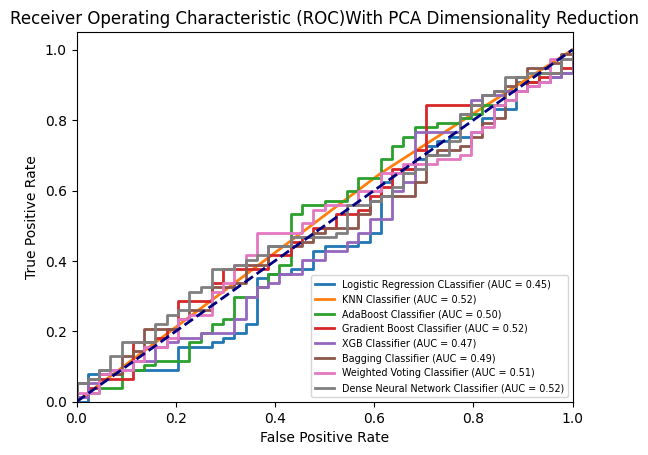

In [ ]:
models = {
    "Logistic Regression CLassifier": logistic_model,
    "KNN Classifier": knn_classifier_smote,
    "AdaBoost Classifier": adaboost_classifier,
    "Gradient Boost Classifier": gradient_boosting_classifier,
    "XGB Classifier": xgb_model,
    "Bagging Classifier": bagging_classifier,
    "Weighted Voting Classifier": voting_classifier,
    "Dense Neural Network Classifier": neural_net_model
}
draw_ROC_curves(X_test, y_test, models, 'With PCA Dimensionality Reduction')

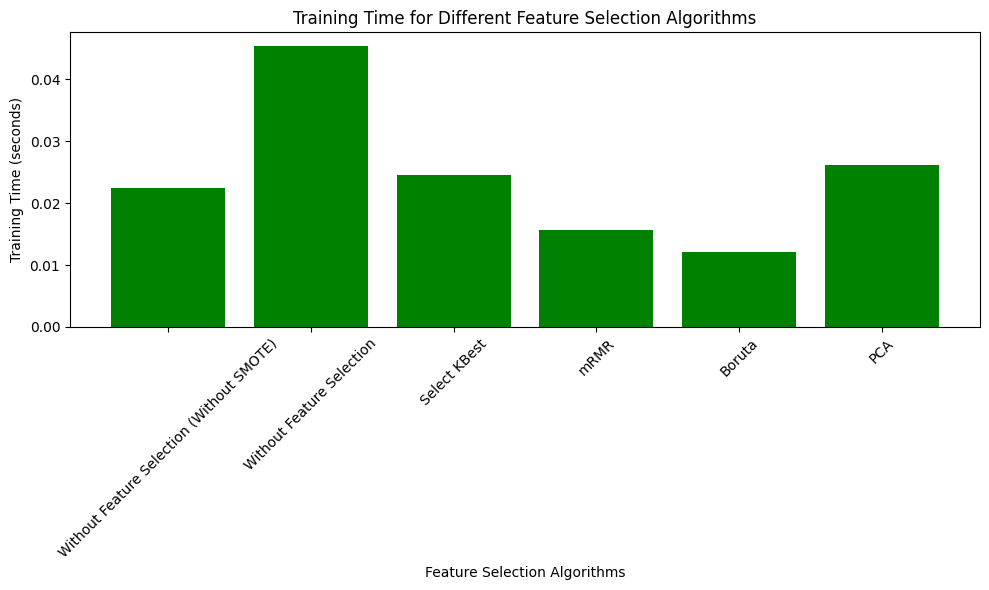

In [ ]:
execution_times_logistic = {
    'Without Feature Selection (Without SMOTE)': logistic_duration_all_features,
    'Without Feature Selection': logistic_duration_all_features_smote,
    'Select KBest': logistic_duration_kbest,
    'mRMR': logistic_duration_mRMR,
    'Boruta': logistic_duration_boruta,
    'PCA': logistic_duration_pca
}
plot_execution_time_histogram(execution_times_logistic)

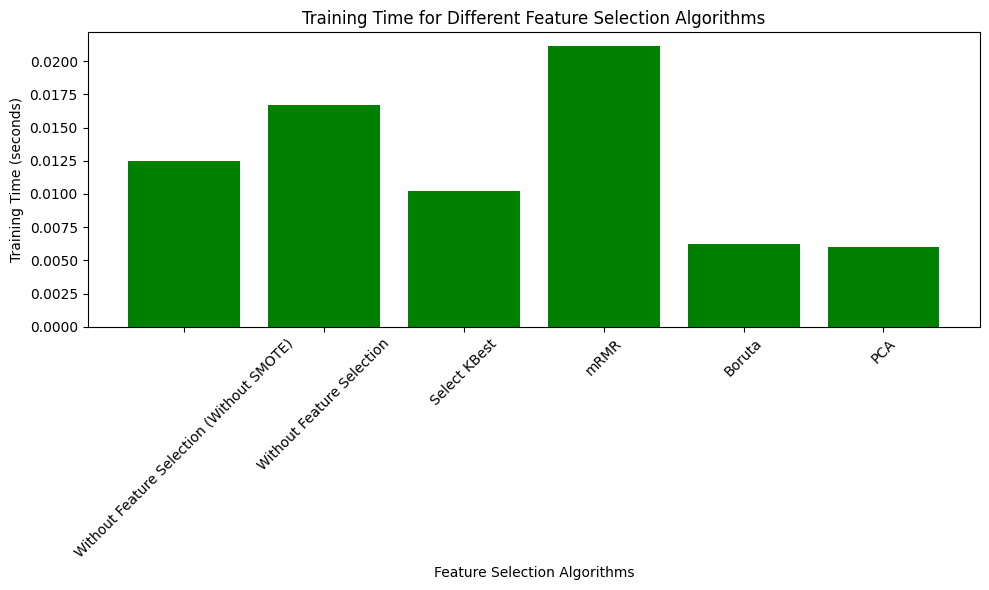

In [ ]:
execution_times_knn = {
    'Without Feature Selection (Without SMOTE)': knn_duration_all_features,
    'Without Feature Selection': knn_duration_all_features_smote,
    'Select KBest': knn_duration_kbest,
    'mRMR': knn_duration_mRMR,
    'Boruta': knn_duration_boruta,
    'PCA': knn_duration_pca
}
plot_execution_time_histogram(execution_times_knn)

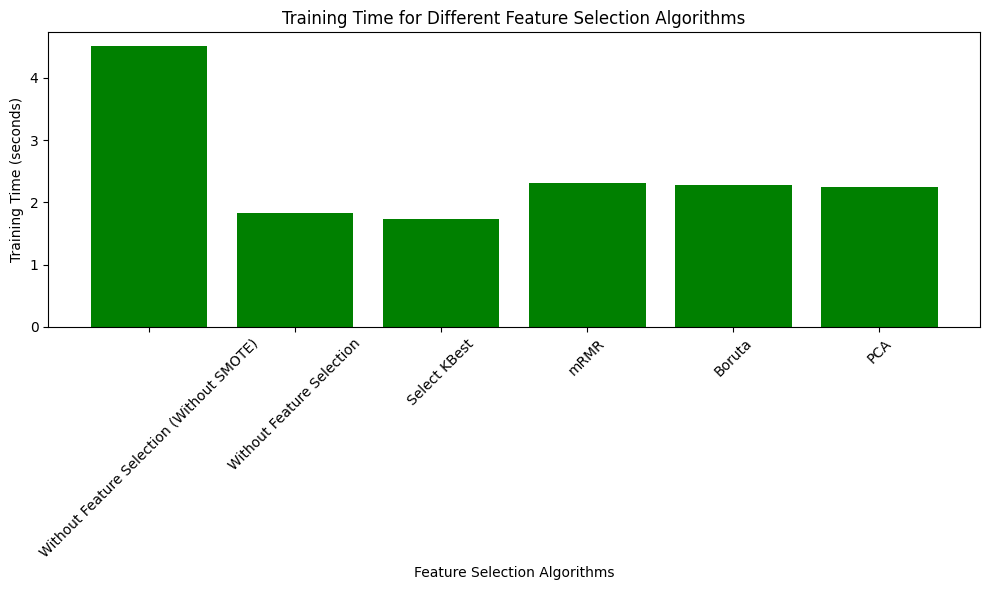

In [ ]:
execution_times_neural_net = {
    'Without Feature Selection (Without SMOTE)': neural_net_duration_all_features,
    'Without Feature Selection': neural_net_duration_all_features_smote,
    'Select KBest': neural_net_duration_kbest,
    'mRMR': neural_net_duration_mRMR,
    'Boruta': neural_net_duration_boruta,
    'PCA': neural_net_duration_pca
}
plot_execution_time_histogram(execution_times_neural_net)

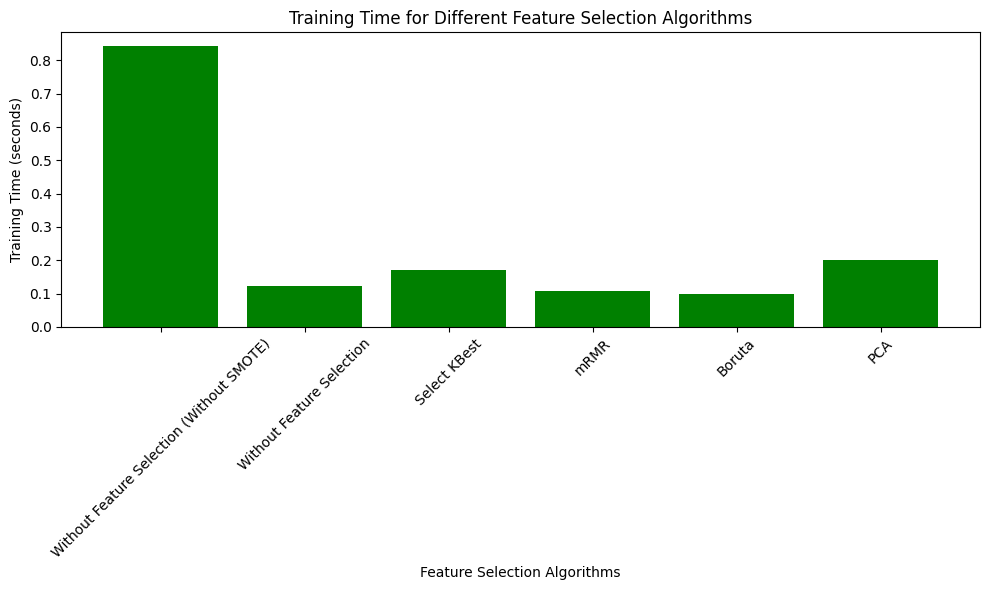

In [ ]:
execution_times_adaboost = {
    'Without Feature Selection (Without SMOTE)': adaboost_duration_all_features,
    'Without Feature Selection': adaboost_duration_all_features_smote,
    'Select KBest': adaboost_duration_kbest,
    'mRMR': adaboost_duration_mRMR,
    'Boruta': adaboost_duration_boruta,
    'PCA': adaboost_duration_pca
}
plot_execution_time_histogram(execution_times_adaboost)

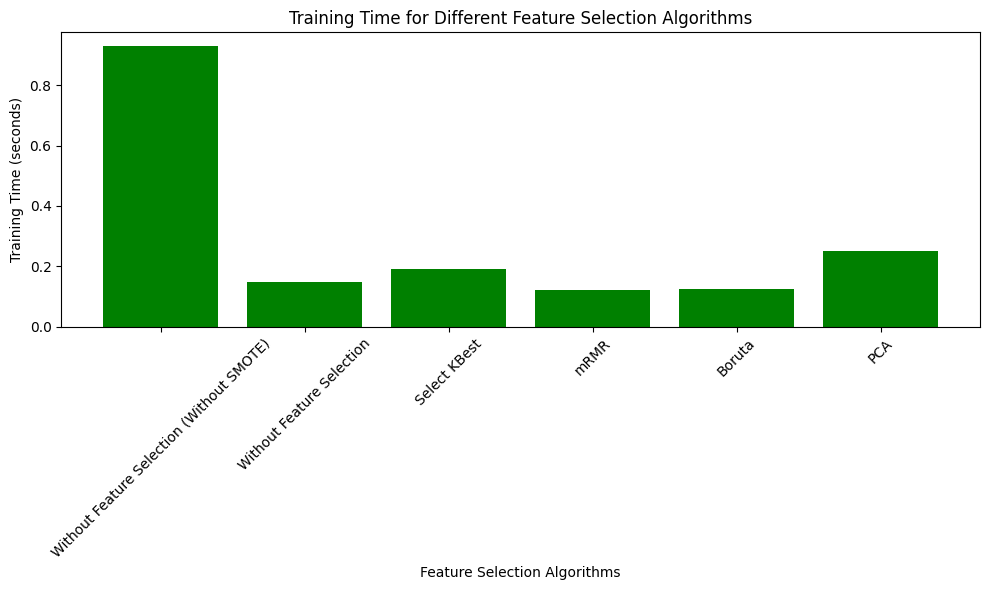

In [ ]:
execution_times_gradient_boosting = {
    'Without Feature Selection (Without SMOTE)': gradient_boosting_duration_all_features,
    'Without Feature Selection': gradient_boosting_duration_all_features_smote,
    'Select KBest': gradient_boosting_duration_kbest,
    'mRMR': gradient_boosting_duration_mRMR,
    'Boruta': gradient_boosting_duration_boruta,
    'PCA': gradient_boosting_duration_pca
}
plot_execution_time_histogram(execution_times_gradient_boosting)

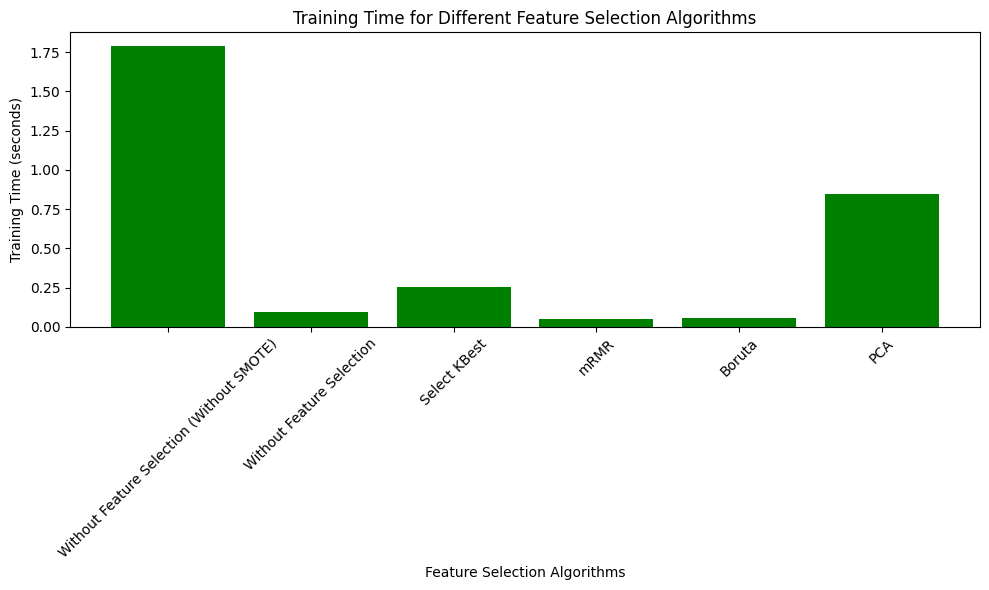

In [ ]:
execution_times_xgboost = {
    'Without Feature Selection (Without SMOTE)': xgb_duration_all_features,
    'Without Feature Selection': xgb_duration_all_features_smote,
    'Select KBest': xgb_duration_kbest,
    'mRMR': xgb_duration_mRMR,
    'Boruta': xgb_duration_boruta,
    'PCA': xgb_duration_pca
}
plot_execution_time_histogram(execution_times_xgboost)

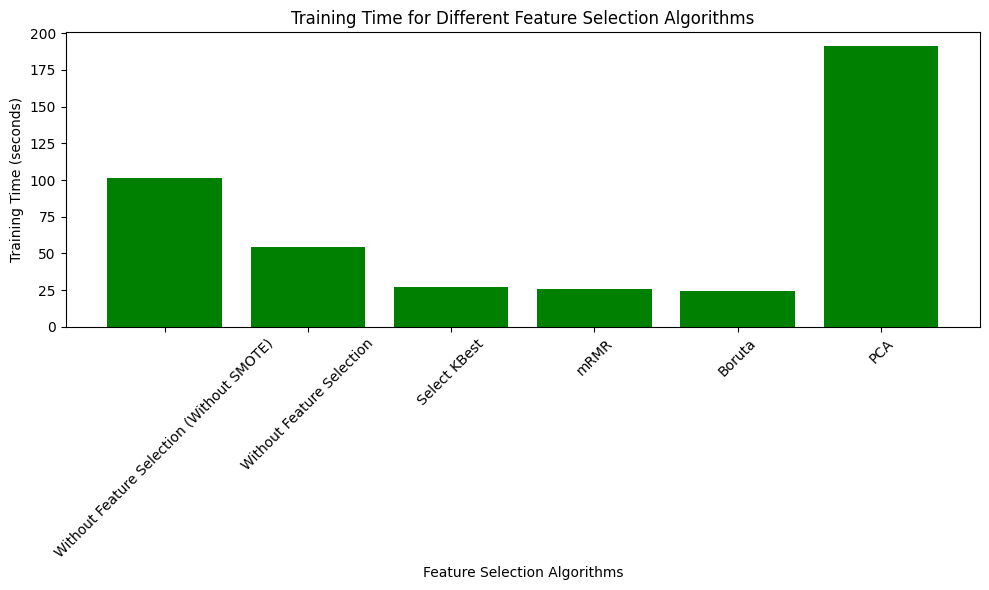

In [ ]:
execution_times_bagging = {
    'Without Feature Selection (Without SMOTE)': bagging_duration_all_features,
    'Without Feature Selection': bagging_duration_all_features_smote,
    'Select KBest': bagging_duration_kbest,
    'mRMR': bagging_duration_mRMR,
    'Boruta': bagging_duration_boruta,
    'PCA': bagging_duration_pca
}
plot_execution_time_histogram(execution_times_bagging)

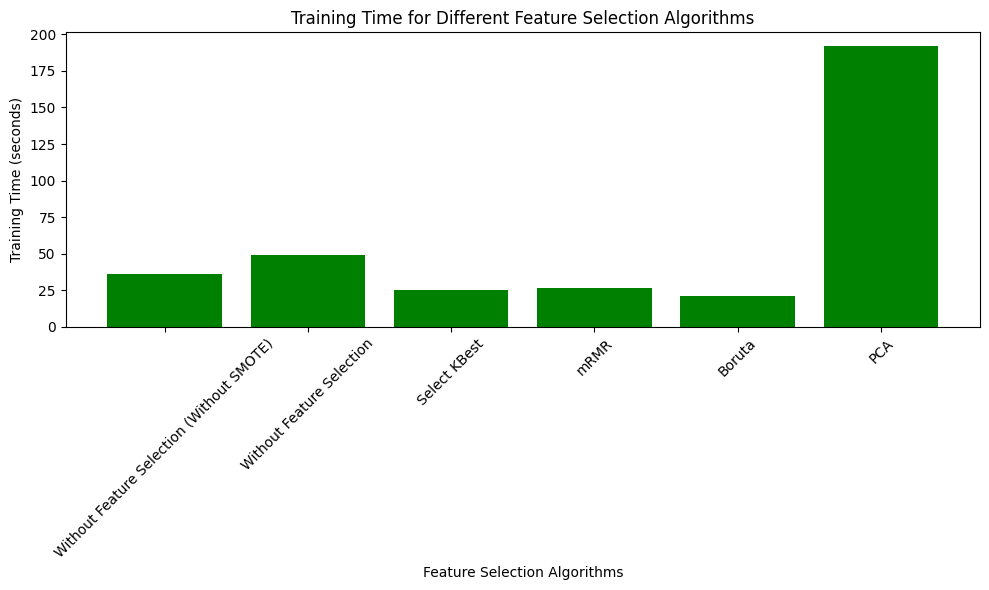

In [ ]:
execution_times_voting = {
    'Without Feature Selection (Without SMOTE)': voting_duration_all_features,
    'Without Feature Selection': voting_duration_all_features_smote,
    'Select KBest': voting_duration_kbest,
    'mRMR': voting_duration_mRMR,
    'Boruta': voting_duration_boruta,
    'PCA': voting_duration_pca
}
plot_execution_time_histogram(execution_times_voting)

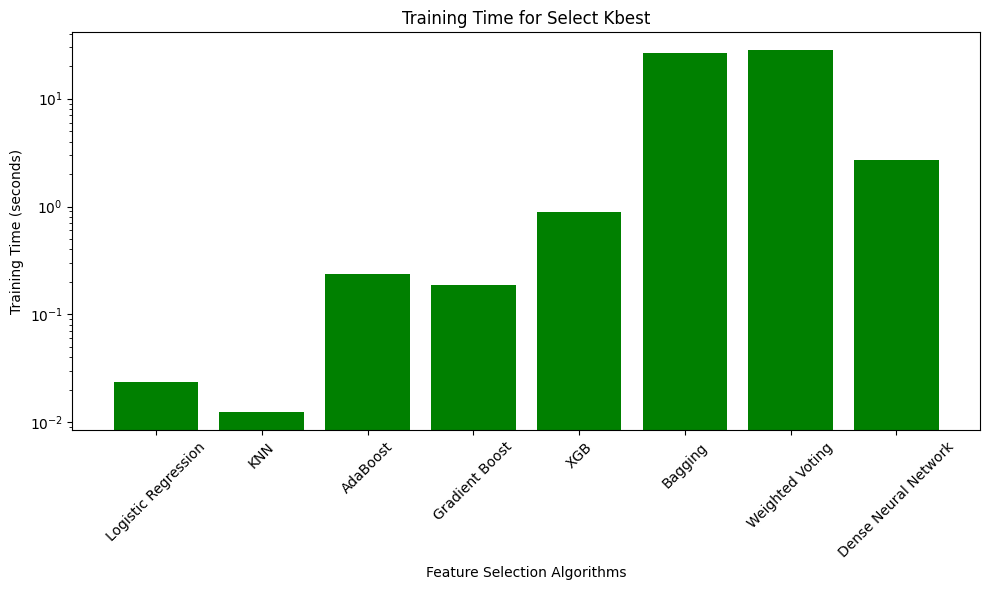

In [43]:
execution_times_best_case = {
    'Logistic Regression': logistic_duration_kbest,
    'KNN': knn_duration_kbest,
    'AdaBoost': adaboost_duration_kbest,
    'Gradient Boost': gradient_boosting_duration_kbest,
    'XGB': xgb_duration_kbest,
    'Bagging': bagging_duration_kbest,
    'Weighted Voting': voting_duration_kbest,
    'Dense Neural Network': neural_net_duration_kbest
}
plot_execution_time_histogram(execution_times_best_case, 'Training Time for Select Kbest')

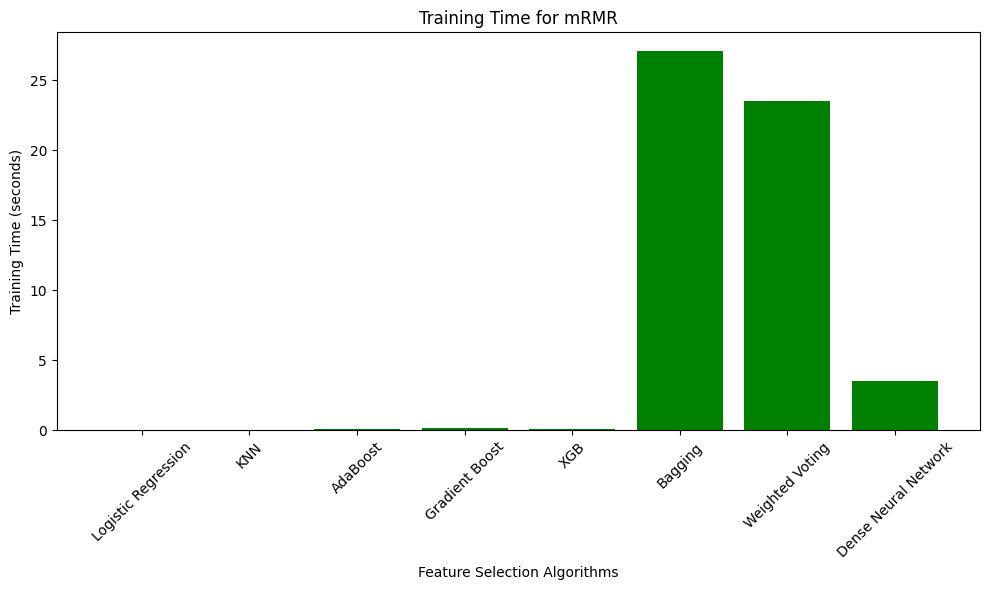

In [ ]:
execution_times_mRMR = {
    'Logistic Regression': logistic_duration_mRMR,
    'KNN': knn_duration_mRMR,
    'AdaBoost': adaboost_duration_mRMR,
    'Gradient Boost': gradient_boosting_duration_mRMR,
    'XGB': xgb_duration_mRMR,
    'Bagging': bagging_duration_mRMR,
    'Weighted Voting': voting_duration_mRMR,
    'Dense Neural Network': neural_net_duration_mRMR
}
plot_execution_time_histogram(execution_times_best_case, 'Training Time for mRMR')

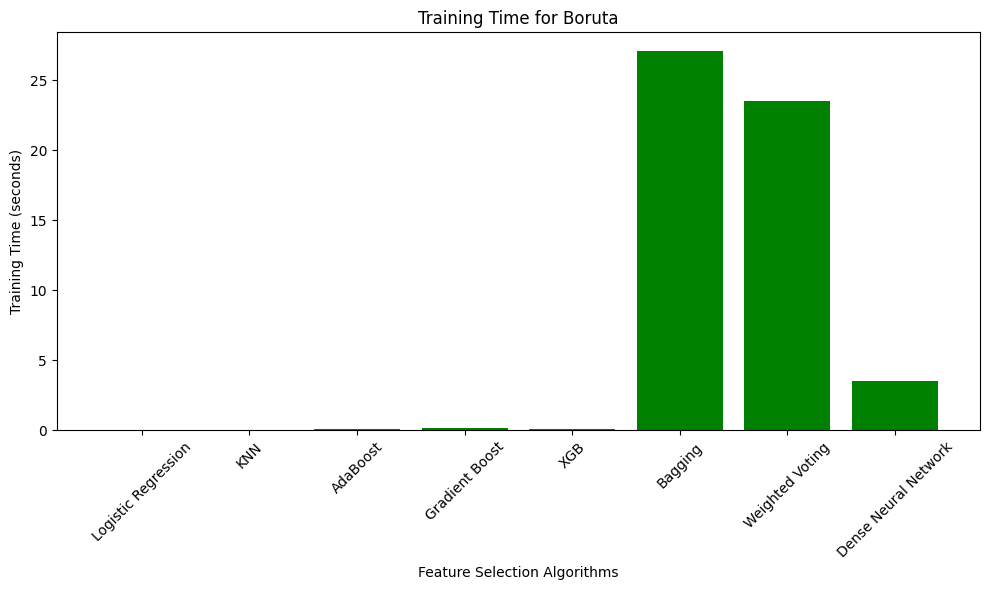

In [ ]:
execution_times_boruta = {
    'Logistic Regression': logistic_duration_boruta,
    'KNN': knn_duration_boruta,
    'AdaBoost': adaboost_duration_boruta,
    'Gradient Boost': gradient_boosting_duration_boruta,
    'XGB': xgb_duration_boruta,
    'Bagging': bagging_duration_boruta,
    'Weighted Voting': voting_duration_boruta,
    'Dense Neural Network': neural_net_duration_boruta
}
plot_execution_time_histogram(execution_times_best_case, 'Training Time for Boruta')

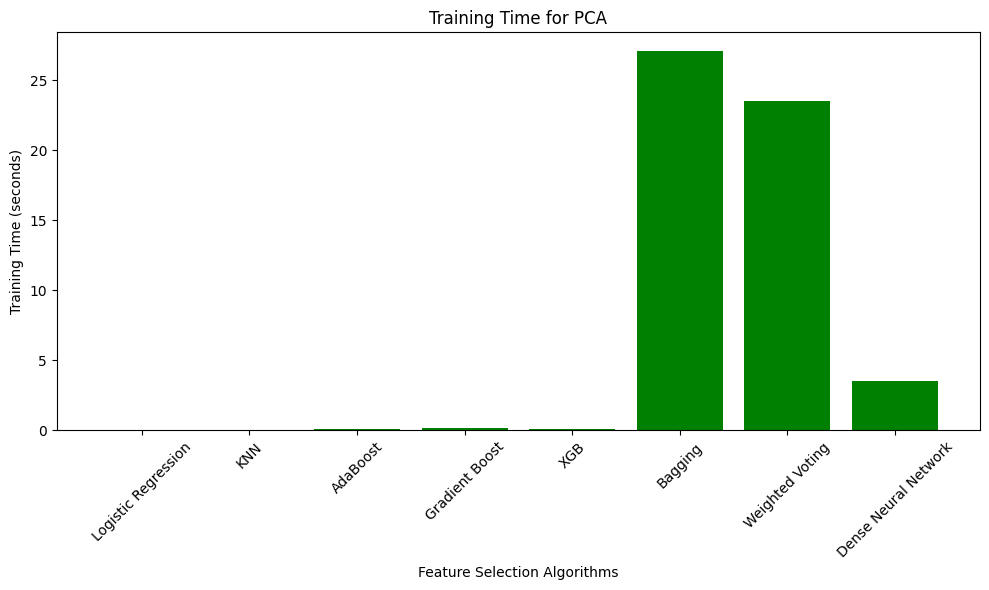

In [ ]:
execution_times_pca = {
    'Logistic Regression': logistic_duration_pca,
    'KNN': knn_duration_pca,
    'AdaBoost': adaboost_duration_pca,
    'Gradient Boost': gradient_boosting_duration_pca,
    'XGB': xgb_duration_pca,
    'Bagging': bagging_duration_pca,
    'Weighted Voting': voting_duration_pca,
    'Dense Neural Network': neural_net_duration_pca
}
plot_execution_time_histogram(execution_times_best_case, 'Training Time for PCA')

#Repetition of above algorithms by using ADASYN balancing algorithm

In [ ]:
from imblearn.over_sampling import ADASYN

X = encoded_df.drop('DEPRESSED', axis=1)
y = encoded_df['DEPRESSED']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

adasyn = ADASYN()

X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

In [ ]:
logistic_accuracy, logistic_model, logistic_duration_adasyn = LogisticRegression_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  90.9090909090909 %
Precision: 95.83333333333334 %
Recall (Sensitivity): 89.6103896103896 %
Specificity: 93.18181818181817 %
F1-score: 92.61744966442951 %
              precision    recall  f1-score   support

           0       0.84      0.93      0.88        44
           1       0.96      0.90      0.93        77

    accuracy                           0.91       121
   macro avg       0.90      0.91      0.90       121
weighted avg       0.91      0.91      0.91       121

True Positives: 69
True Negatives: 41
False Positives: 3
False Negatives: 8


In [ ]:
knn_accuracy_adasyn, knn_classifier_smote, knn_duration_adasyn = KNN_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  84.29752066115702 %
Precision: 91.42857142857143 %
Recall (Sensitivity): 83.11688311688312 %
Specificity: 86.36363636363636 %
F1-score: 87.07482993197279 %
              precision    recall  f1-score   support

           0       0.75      0.86      0.80        44
           1       0.91      0.83      0.87        77

    accuracy                           0.84       121
   macro avg       0.83      0.85      0.84       121
weighted avg       0.85      0.84      0.85       121

True Positives: 64
True Negatives: 38
False Positives: 6
False Negatives: 13


In [ ]:
adaboost_accuracy, adaboost_classifier, adaboost_duration_adasyn = AdaBoost_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  89.25619834710744 %
Precision: 98.48484848484848 %
Recall (Sensitivity): 84.4155844155844 %
Specificity: 97.72727272727273 %
F1-score: 90.9090909090909 %
              precision    recall  f1-score   support

           0       0.78      0.98      0.87        44
           1       0.98      0.84      0.91        77

    accuracy                           0.89       121
   macro avg       0.88      0.91      0.89       121
weighted avg       0.91      0.89      0.89       121

True Positives: 65
True Negatives: 43
False Positives: 1
False Negatives: 12


In [ ]:
gradientboosting_accuracy, gradient_boosting_classifier, gradient_boosting_duration_adasyn = GradientBoosting_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  87.60330578512396 %
Precision: 98.4375 %
Recall (Sensitivity): 81.81818181818183 %
Specificity: 97.72727272727273 %
F1-score: 89.36170212765957 %
              precision    recall  f1-score   support

           0       0.75      0.98      0.85        44
           1       0.98      0.82      0.89        77

    accuracy                           0.88       121
   macro avg       0.87      0.90      0.87       121
weighted avg       0.90      0.88      0.88       121

True Positives: 63
True Negatives: 43
False Positives: 1
False Negatives: 14


In [ ]:
xgb_accuracy, xgb_model, xgb_duration_adasyn = XGB_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  83.47107438016529 %
Precision: 91.30434782608695 %
Recall (Sensitivity): 81.81818181818183 %
Specificity: 86.36363636363636 %
F1-score: 86.3013698630137 %
              precision    recall  f1-score   support

           0       0.73      0.86      0.79        44
           1       0.91      0.82      0.86        77

    accuracy                           0.83       121
   macro avg       0.82      0.84      0.83       121
weighted avg       0.85      0.83      0.84       121

True Positives: 63
True Negatives: 38
False Positives: 6
False Negatives: 14


In [ ]:
bagging_accuracy, bagging_classifier, bagging_duration_adasyn = Bagging_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  89.25619834710744 %
Precision: 98.48484848484848 %
Recall (Sensitivity): 84.4155844155844 %
Specificity: 97.72727272727273 %
F1-score: 90.9090909090909 %
              precision    recall  f1-score   support

           0       0.78      0.98      0.87        44
           1       0.98      0.84      0.91        77

    accuracy                           0.89       121
   macro avg       0.88      0.91      0.89       121
weighted avg       0.91      0.89      0.89       121

True Positives: 65
True Negatives: 43
False Positives: 1
False Negatives: 12


In [ ]:
weightedvoting_accuracy, voting_classifier, voting_duration_adasyn = WeightedVoting_Classification(X_train_resampled, X_test, y_train_resampled, y_test,
                                                                           gradient_boosting_classifier, bagging_classifier, adaboost_classifier)

Accuracy:  90.08264462809917 %
Precision: 93.33333333333333 %
Recall (Sensitivity): 90.9090909090909 %
Specificity: 88.63636363636364 %
F1-score: 92.10526315789474 %
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        44
           1       0.93      0.91      0.92        77

    accuracy                           0.90       121
   macro avg       0.89      0.90      0.89       121
weighted avg       0.90      0.90      0.90       121

True Positives: 70
True Negatives: 39
False Positives: 5
False Negatives: 7


In [ ]:
neural_net_accuracy, neural_net_model, neural_net_duration_adasyn = Neural_Net_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 64)                1984      
                                                                 
 dense_29 (Dense)            (None, 32)                2080      
                                                                 
 dense_30 (Dense)            (None, 16)                528       
                                                                 
 dense_31 (Dense)            (None, 1)                 17        
                                                                 
Total params: 4609 (18.00 KB)
Trainable params: 4609 (18.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
4/4 [==============================] - 0s 5ms/step - loss: 0.2644 - accuracy: 0.9008
Accuracy:  90.08264462809917 %
Precision: 89.1566265060241 %
Recall

4/4 [==============================] - 0s 5ms/step


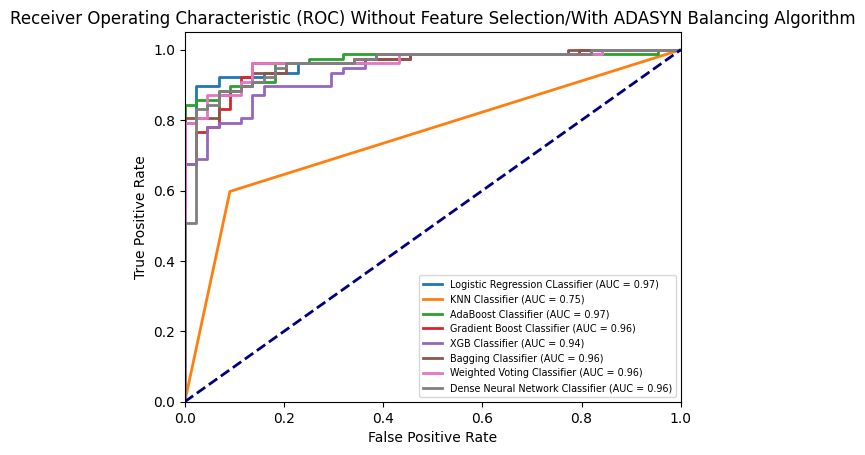

In [ ]:
models = {
    "Logistic Regression CLassifier": logistic_model,
    "KNN Classifier": knn_classifier_adasyn,
    "AdaBoost Classifier": adaboost_classifier,
    "Gradient Boost Classifier": gradient_boosting_classifier,
    "XGB Classifier": xgb_model,
    "Bagging Classifier": bagging_classifier,
    "Weighted Voting Classifier": voting_classifier,
    "Dense Neural Network Classifier": neural_net_model
}
draw_ROC_curves(X_test, y_test, models, ' Without Feature Selection/With ADASYN Balancing Algorithm')

In [ ]:
X = df_KBest.drop('DEPRESSED', axis=1)
y = df_KBest['DEPRESSED']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

adasyn = ADASYN()

X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

print("RESULTS AFTER DIMENSIONALITY REDUCTION WITH Select KBest")

RESULTS AFTER DIMENSIONALITY REDUCTION WITH Select KBest


In [ ]:
logistic_accuracy, logistic_model, logistic_duration_adasyn = LogisticRegression_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  89.25619834710744 %
Precision: 98.48484848484848 %
Recall (Sensitivity): 84.4155844155844 %
Specificity: 97.72727272727273 %
F1-score: 90.9090909090909 %
              precision    recall  f1-score   support

           0       0.78      0.98      0.87        44
           1       0.98      0.84      0.91        77

    accuracy                           0.89       121
   macro avg       0.88      0.91      0.89       121
weighted avg       0.91      0.89      0.89       121

True Positives: 65
True Negatives: 43
False Positives: 1
False Negatives: 12


In [ ]:
knn_accuracy_adasyn, knn_classifier, knn_duration_adasyn = KNN_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  84.29752066115702 %
Precision: 91.42857142857143 %
Recall (Sensitivity): 83.11688311688312 %
Specificity: 86.36363636363636 %
F1-score: 87.07482993197279 %
              precision    recall  f1-score   support

           0       0.75      0.86      0.80        44
           1       0.91      0.83      0.87        77

    accuracy                           0.84       121
   macro avg       0.83      0.85      0.84       121
weighted avg       0.85      0.84      0.85       121

True Positives: 64
True Negatives: 38
False Positives: 6
False Negatives: 13


In [ ]:
adaboost_accuracy, adaboost_classifier, adaboost_duration_adasyn = AdaBoost_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  89.25619834710744 %
Precision: 98.48484848484848 %
Recall (Sensitivity): 84.4155844155844 %
Specificity: 97.72727272727273 %
F1-score: 90.9090909090909 %
              precision    recall  f1-score   support

           0       0.78      0.98      0.87        44
           1       0.98      0.84      0.91        77

    accuracy                           0.89       121
   macro avg       0.88      0.91      0.89       121
weighted avg       0.91      0.89      0.89       121

True Positives: 65
True Negatives: 43
False Positives: 1
False Negatives: 12


In [ ]:
gradientboosting_accuracy, gradient_boosting_classifier, gradient_boosting_duration_adasyn = GradientBoosting_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  87.60330578512396 %
Precision: 98.4375 %
Recall (Sensitivity): 81.81818181818183 %
Specificity: 97.72727272727273 %
F1-score: 89.36170212765957 %
              precision    recall  f1-score   support

           0       0.75      0.98      0.85        44
           1       0.98      0.82      0.89        77

    accuracy                           0.88       121
   macro avg       0.87      0.90      0.87       121
weighted avg       0.90      0.88      0.88       121

True Positives: 63
True Negatives: 43
False Positives: 1
False Negatives: 14


In [ ]:
xgb_accuracy, xgb_model, xgb_duration_adasyn = XGB_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  83.47107438016529 %
Precision: 91.30434782608695 %
Recall (Sensitivity): 81.81818181818183 %
Specificity: 86.36363636363636 %
F1-score: 86.3013698630137 %
              precision    recall  f1-score   support

           0       0.73      0.86      0.79        44
           1       0.91      0.82      0.86        77

    accuracy                           0.83       121
   macro avg       0.82      0.84      0.83       121
weighted avg       0.85      0.83      0.84       121

True Positives: 63
True Negatives: 38
False Positives: 6
False Negatives: 14


In [ ]:
bagging_accuracy, bagging_classifier, bagging_duration_adasyn = Bagging_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  89.25619834710744 %
Precision: 98.48484848484848 %
Recall (Sensitivity): 84.4155844155844 %
Specificity: 97.72727272727273 %
F1-score: 90.9090909090909 %
              precision    recall  f1-score   support

           0       0.78      0.98      0.87        44
           1       0.98      0.84      0.91        77

    accuracy                           0.89       121
   macro avg       0.88      0.91      0.89       121
weighted avg       0.91      0.89      0.89       121

True Positives: 65
True Negatives: 43
False Positives: 1
False Negatives: 12


In [ ]:
weightedvoting_accuracy, voting_classifier, voting_duration_adasyn = WeightedVoting_Classification(X_train_resampled, X_test, y_train_resampled, y_test,
                                                                           gradient_boosting_classifier, bagging_classifier, adaboost_classifier)

Accuracy:  88.42975206611571 %
Precision: 98.46153846153847 %
Recall (Sensitivity): 83.11688311688312 %
Specificity: 97.72727272727273 %
F1-score: 90.14084507042254 %
              precision    recall  f1-score   support

           0       0.77      0.98      0.86        44
           1       0.98      0.83      0.90        77

    accuracy                           0.88       121
   macro avg       0.88      0.90      0.88       121
weighted avg       0.91      0.88      0.89       121

True Positives: 64
True Negatives: 43
False Positives: 1
False Negatives: 13


In [ ]:
neural_net_accuracy, neural_net_model, neural_net_duration_adasyn = Neural_Net_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 64)                1024      
                                                                 
 dense_33 (Dense)            (None, 32)                2080      
                                                                 
 dense_34 (Dense)            (None, 16)                528       
                                                                 
 dense_35 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3649 (14.25 KB)
Trainable params: 3649 (14.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
4/4 [==============================] - 0s 5ms/step - loss: 0.2585 - accuracy: 0.8926
Accuracy:  89.25619834710744 %
Precision: 98.48484848484848 %
Recal

4/4 [==============================] - 0s 9ms/step


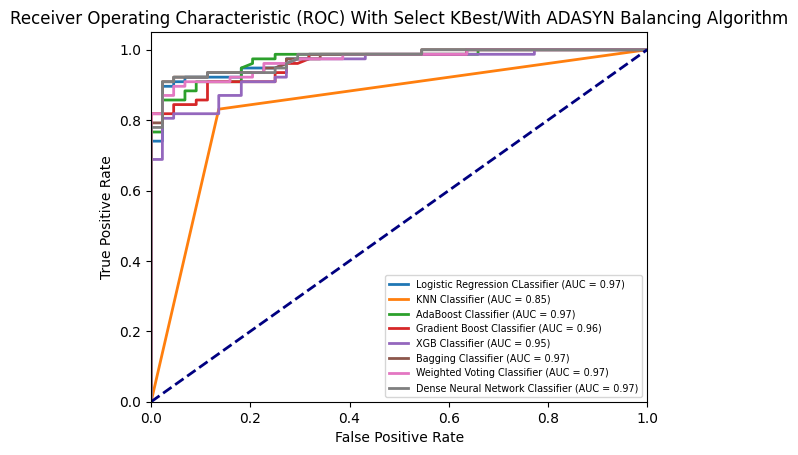

In [ ]:
models = {
    "Logistic Regression CLassifier": logistic_model,
    "KNN Classifier": knn_classifier,
    "AdaBoost Classifier": adaboost_classifier,
    "Gradient Boost Classifier": gradient_boosting_classifier,
    "XGB Classifier": xgb_model,
    "Bagging Classifier": bagging_classifier,
    "Weighted Voting Classifier": voting_classifier,
    "Dense Neural Network Classifier": neural_net_model
}
draw_ROC_curves(X_test, y_test, models, ' With Select KBest/With ADASYN Balancing Algorithm')

In [ ]:
X = df_mRMR.drop('DEPRESSED', axis=1)
y = df_mRMR['DEPRESSED']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

adasyn = ADASYN()

X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

print("RESULTS AFTER DIMENSIONALITY REDUCTION WITH mRMR")

RESULTS AFTER DIMENSIONALITY REDUCTION WITH mRMR


In [ ]:
logistic_accuracy, logistic_model, logistic_duration_adasyn = LogisticRegression_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  89.25619834710744 %
Precision: 98.48484848484848 %
Recall (Sensitivity): 84.4155844155844 %
Specificity: 97.72727272727273 %
F1-score: 90.9090909090909 %
              precision    recall  f1-score   support

           0       0.78      0.98      0.87        44
           1       0.98      0.84      0.91        77

    accuracy                           0.89       121
   macro avg       0.88      0.91      0.89       121
weighted avg       0.91      0.89      0.89       121

True Positives: 65
True Negatives: 43
False Positives: 1
False Negatives: 12


In [ ]:
knn_accuracy_adasyn, knn_classifier, knn_duration_adasyn = KNN_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  77.68595041322314 %
Precision: 87.87878787878788 %
Recall (Sensitivity): 75.32467532467533 %
Specificity: 81.81818181818183 %
F1-score: 81.11888111888112 %
              precision    recall  f1-score   support

           0       0.65      0.82      0.73        44
           1       0.88      0.75      0.81        77

    accuracy                           0.78       121
   macro avg       0.77      0.79      0.77       121
weighted avg       0.80      0.78      0.78       121

True Positives: 58
True Negatives: 36
False Positives: 8
False Negatives: 19


In [ ]:
adaboost_accuracy, adaboost_classifier, adaboost_duration_adasyn = AdaBoost_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  89.25619834710744 %
Precision: 97.05882352941177 %
Recall (Sensitivity): 85.71428571428571 %
Specificity: 95.45454545454545 %
F1-score: 91.03448275862068 %
              precision    recall  f1-score   support

           0       0.79      0.95      0.87        44
           1       0.97      0.86      0.91        77

    accuracy                           0.89       121
   macro avg       0.88      0.91      0.89       121
weighted avg       0.91      0.89      0.89       121

True Positives: 66
True Negatives: 42
False Positives: 2
False Negatives: 11


In [ ]:
gradientboosting_accuracy, gradient_boosting_classifier, gradient_boosting_duration_adasyn = GradientBoosting_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  85.9504132231405 %
Precision: 94.11764705882352 %
Recall (Sensitivity): 83.11688311688312 %
Specificity: 90.9090909090909 %
F1-score: 88.27586206896552 %
              precision    recall  f1-score   support

           0       0.75      0.91      0.82        44
           1       0.94      0.83      0.88        77

    accuracy                           0.86       121
   macro avg       0.85      0.87      0.85       121
weighted avg       0.87      0.86      0.86       121

True Positives: 64
True Negatives: 40
False Positives: 4
False Negatives: 13


In [ ]:
xgb_accuracy, xgb_model, xgb_duration_adasyn = XGB_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  85.12396694214877 %
Precision: 90.41095890410958 %
Recall (Sensitivity): 85.71428571428571 %
Specificity: 84.0909090909091 %
F1-score: 88.0 %
              precision    recall  f1-score   support

           0       0.77      0.84      0.80        44
           1       0.90      0.86      0.88        77

    accuracy                           0.85       121
   macro avg       0.84      0.85      0.84       121
weighted avg       0.86      0.85      0.85       121

True Positives: 66
True Negatives: 37
False Positives: 7
False Negatives: 11


In [ ]:
bagging_accuracy, bagging_classifier, bagging_duration_adasyn = Bagging_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  90.9090909090909 %
Precision: 100.0 %
Recall (Sensitivity): 85.71428571428571 %
Specificity: 100.0 %
F1-score: 92.3076923076923 %
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        44
           1       1.00      0.86      0.92        77

    accuracy                           0.91       121
   macro avg       0.90      0.93      0.91       121
weighted avg       0.93      0.91      0.91       121

True Positives: 66
True Negatives: 44
False Positives: 0
False Negatives: 11


In [ ]:
weightedvoting_accuracy, voting_classifier, voting_duration_adasyn = WeightedVoting_Classification(X_train_resampled, X_test, y_train_resampled, y_test,
                                                                           gradient_boosting_classifier, bagging_classifier, adaboost_classifier)

Accuracy:  90.08264462809917 %
Precision: 98.50746268656717 %
Recall (Sensitivity): 85.71428571428571 %
Specificity: 97.72727272727273 %
F1-score: 91.66666666666667 %
              precision    recall  f1-score   support

           0       0.80      0.98      0.88        44
           1       0.99      0.86      0.92        77

    accuracy                           0.90       121
   macro avg       0.89      0.92      0.90       121
weighted avg       0.92      0.90      0.90       121

True Positives: 66
True Negatives: 43
False Positives: 1
False Negatives: 11


In [ ]:
neural_net_accuracy, neural_net_model, neural_net_duration_adasyn = Neural_Net_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 64)                1024      
                                                                 
 dense_37 (Dense)            (None, 32)                2080      
                                                                 
 dense_38 (Dense)            (None, 16)                528       
                                                                 
 dense_39 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3649 (14.25 KB)
Trainable params: 3649 (14.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
4/4 [==============================] - 0s 5ms/step - loss: 0.2297 - accuracy: 0.9008
Accuracy:  90.08264462809917 %
Precision: 97.10144927536231 %
Recal

4/4 [==============================] - 0s 3ms/step


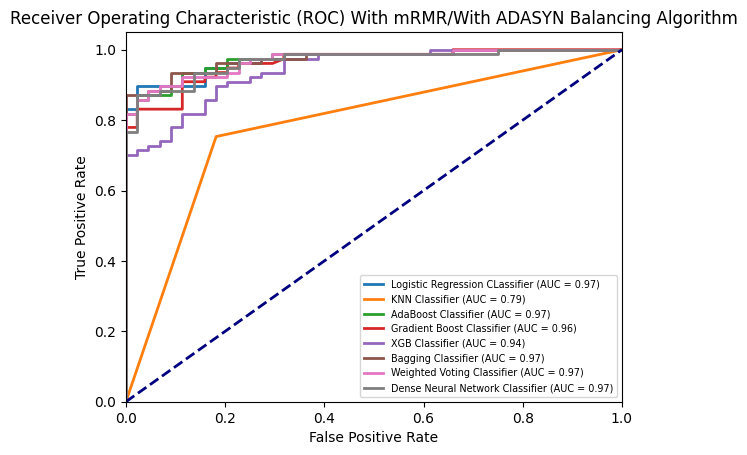

In [ ]:
models = {
    "Logistic Regression CLassifier": logistic_model,
    "KNN Classifier": knn_classifier,
    "AdaBoost Classifier": adaboost_classifier,
    "Gradient Boost Classifier": gradient_boosting_classifier,
    "XGB Classifier": xgb_model,
    "Bagging Classifier": bagging_classifier,
    "Weighted Voting Classifier": voting_classifier,
    "Dense Neural Network Classifier": neural_net_model
}
draw_ROC_curves(X_test, y_test, models, ' With mRMR/With ADASYN Balancing Algorithm')

In [ ]:
X = df_boruta.drop('DEPRESSED', axis=1)
y = df_boruta['DEPRESSED']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

adasyn = ADASYN()

X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

print("RESULTS AFTER DIMENSIONALITY REDUCTION WITH Boruta")

RESULTS AFTER DIMENSIONALITY REDUCTION WITH Boruta


In [ ]:
logistic_accuracy, logistic_model, logistic_duration_adasyn = LogisticRegression_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  85.12396694214877 %
Precision: 94.02985074626866 %
Recall (Sensitivity): 81.81818181818183 %
Specificity: 90.9090909090909 %
F1-score: 87.50000000000001 %
              precision    recall  f1-score   support

           0       0.74      0.91      0.82        44
           1       0.94      0.82      0.88        77

    accuracy                           0.85       121
   macro avg       0.84      0.86      0.85       121
weighted avg       0.87      0.85      0.85       121

True Positives: 63
True Negatives: 40
False Positives: 4
False Negatives: 14


In [ ]:
knn_accuracy_adasyn, knn_classifier, knn_duration_adasyn = KNN_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  69.42148760330579 %
Precision: 81.25 %
Recall (Sensitivity): 67.53246753246754 %
Specificity: 72.72727272727273 %
F1-score: 73.75886524822694 %
              precision    recall  f1-score   support

           0       0.56      0.73      0.63        44
           1       0.81      0.68      0.74        77

    accuracy                           0.69       121
   macro avg       0.69      0.70      0.69       121
weighted avg       0.72      0.69      0.70       121

True Positives: 52
True Negatives: 32
False Positives: 12
False Negatives: 25


In [ ]:
adaboost_accuracy, adaboost_classifier, adaboost_duration_adasyn = AdaBoost_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  82.64462809917356 %
Precision: 91.17647058823529 %
Recall (Sensitivity): 80.51948051948052 %
Specificity: 86.36363636363636 %
F1-score: 85.51724137931035 %
              precision    recall  f1-score   support

           0       0.72      0.86      0.78        44
           1       0.91      0.81      0.86        77

    accuracy                           0.83       121
   macro avg       0.81      0.83      0.82       121
weighted avg       0.84      0.83      0.83       121

True Positives: 62
True Negatives: 38
False Positives: 6
False Negatives: 15


In [ ]:
gradientboosting_accuracy, gradient_boosting_classifier, gradient_boosting_duration_adasyn = GradientBoosting_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  81.81818181818183 %
Precision: 88.73239436619718 %
Recall (Sensitivity): 81.81818181818183 %
Specificity: 81.81818181818183 %
F1-score: 85.13513513513514 %
              precision    recall  f1-score   support

           0       0.72      0.82      0.77        44
           1       0.89      0.82      0.85        77

    accuracy                           0.82       121
   macro avg       0.80      0.82      0.81       121
weighted avg       0.83      0.82      0.82       121

True Positives: 63
True Negatives: 36
False Positives: 8
False Negatives: 14


In [ ]:
xgb_accuracy, xgb_model, xgb_duration_adasyn = XGB_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  80.99173553719008 %
Precision: 89.70588235294117 %
Recall (Sensitivity): 79.22077922077922 %
Specificity: 84.0909090909091 %
F1-score: 84.13793103448276 %
              precision    recall  f1-score   support

           0       0.70      0.84      0.76        44
           1       0.90      0.79      0.84        77

    accuracy                           0.81       121
   macro avg       0.80      0.82      0.80       121
weighted avg       0.82      0.81      0.81       121

True Positives: 61
True Negatives: 37
False Positives: 7
False Negatives: 16


In [ ]:
bagging_accuracy, bagging_classifier, bagging_duration_adasyn = Bagging_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  84.29752066115702 %
Precision: 93.93939393939394 %
Recall (Sensitivity): 80.51948051948052 %
Specificity: 90.9090909090909 %
F1-score: 86.71328671328672 %
              precision    recall  f1-score   support

           0       0.73      0.91      0.81        44
           1       0.94      0.81      0.87        77

    accuracy                           0.84       121
   macro avg       0.83      0.86      0.84       121
weighted avg       0.86      0.84      0.85       121

True Positives: 62
True Negatives: 40
False Positives: 4
False Negatives: 15


In [ ]:
weightedvoting_accuracy, voting_classifier, voting_duration_adasyn = WeightedVoting_Classification(X_train_resampled, X_test, y_train_resampled, y_test,
                                                                           gradient_boosting_classifier, bagging_classifier, adaboost_classifier)

Accuracy:  85.9504132231405 %
Precision: 92.85714285714286 %
Recall (Sensitivity): 84.4155844155844 %
Specificity: 88.63636363636364 %
F1-score: 88.43537414965986 %
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        44
           1       0.93      0.84      0.88        77

    accuracy                           0.86       121
   macro avg       0.85      0.87      0.85       121
weighted avg       0.87      0.86      0.86       121

True Positives: 65
True Negatives: 39
False Positives: 5
False Negatives: 12


In [ ]:
neural_net_accuracy, neural_net_model, neural_net_duration_adasyn = Neural_Net_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 64)                704       
                                                                 
 dense_41 (Dense)            (None, 32)                2080      
                                                                 
 dense_42 (Dense)            (None, 16)                528       
                                                                 
 dense_43 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3329 (13.00 KB)
Trainable params: 3329 (13.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
4/4 [==============================] - 0s 5ms/step - loss: 0.3659 - accuracy: 0.8347
Accuracy:  83.47107438016529 %
Precision: 92.53731343283582 %
Reca

4/4 [==============================] - 0s 3ms/step


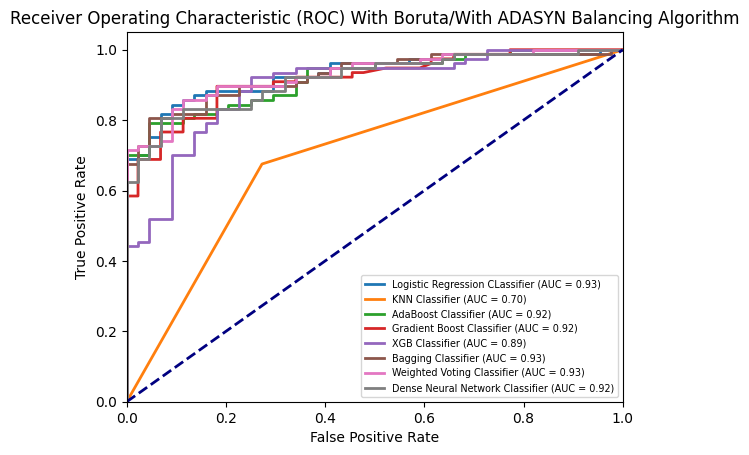

In [ ]:
models = {
    "Logistic Regression CLassifier": logistic_model,
    "KNN Classifier": knn_classifier,
    "AdaBoost Classifier": adaboost_classifier,
    "Gradient Boost Classifier": gradient_boosting_classifier,
    "XGB Classifier": xgb_model,
    "Bagging Classifier": bagging_classifier,
    "Weighted Voting Classifier": voting_classifier,
    "Dense Neural Network Classifier": neural_net_model
}
draw_ROC_curves(X_test, y_test, models, ' With Boruta/With ADASYN Balancing Algorithm')

In [ ]:
X = df_pca.drop('DEPRESSED', axis=1)
y = df_pca['DEPRESSED']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

adasyn = ADASYN()

X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

print("RESULTS AFTER DIMENSIONALITY REDUCTION WITH PCA")

RESULTS AFTER DIMENSIONALITY REDUCTION WITH PCA


In [ ]:
logistic_accuracy, logistic_model, logistic_duration_adasyn = LogisticRegression_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  57.02479338842975 %
Precision: 64.36781609195403 %
Recall (Sensitivity): 72.72727272727273 %
Specificity: 29.545454545454547 %
F1-score: 68.29268292682927 %
              precision    recall  f1-score   support

           0       0.38      0.30      0.33        44
           1       0.64      0.73      0.68        77

    accuracy                           0.57       121
   macro avg       0.51      0.51      0.51       121
weighted avg       0.55      0.57      0.56       121

True Positives: 56
True Negatives: 13
False Positives: 31
False Negatives: 21


In [ ]:
knn_accuracy_adasyn, knn_classifier, knn_duration_adasyn = KNN_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  52.892561983471076 %
Precision: 63.888888888888886 %
Recall (Sensitivity): 59.74025974025974 %
Specificity: 40.909090909090914 %
F1-score: 61.74496644295301 %
              precision    recall  f1-score   support

           0       0.37      0.41      0.39        44
           1       0.64      0.60      0.62        77

    accuracy                           0.53       121
   macro avg       0.50      0.50      0.50       121
weighted avg       0.54      0.53      0.53       121

True Positives: 46
True Negatives: 18
False Positives: 26
False Negatives: 31


In [ ]:
adaboost_accuracy, adaboost_classifier, adaboost_duration_adasyn = AdaBoost_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  59.50413223140496 %
Precision: 66.27906976744185 %
Recall (Sensitivity): 74.02597402597402 %
Specificity: 34.090909090909086 %
F1-score: 69.93865030674846 %
              precision    recall  f1-score   support

           0       0.43      0.34      0.38        44
           1       0.66      0.74      0.70        77

    accuracy                           0.60       121
   macro avg       0.55      0.54      0.54       121
weighted avg       0.58      0.60      0.58       121

True Positives: 57
True Negatives: 15
False Positives: 29
False Negatives: 20


In [ ]:
gradientboosting_accuracy, gradient_boosting_classifier, gradient_boosting_duration_adasyn = GradientBoosting_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  57.02479338842975 %
Precision: 64.04494382022472 %
Recall (Sensitivity): 74.02597402597402 %
Specificity: 27.27272727272727 %
F1-score: 68.67469879518073 %
              precision    recall  f1-score   support

           0       0.38      0.27      0.32        44
           1       0.64      0.74      0.69        77

    accuracy                           0.57       121
   macro avg       0.51      0.51      0.50       121
weighted avg       0.54      0.57      0.55       121

True Positives: 57
True Negatives: 12
False Positives: 32
False Negatives: 20


In [ ]:
xgb_accuracy, xgb_model, xgb_duration_adasyn = XGB_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  55.371900826446286 %
Precision: 62.637362637362635 %
Recall (Sensitivity): 74.02597402597402 %
Specificity: 22.727272727272727 %
F1-score: 67.85714285714286 %
              precision    recall  f1-score   support

           0       0.33      0.23      0.27        44
           1       0.63      0.74      0.68        77

    accuracy                           0.55       121
   macro avg       0.48      0.48      0.47       121
weighted avg       0.52      0.55      0.53       121

True Positives: 57
True Negatives: 10
False Positives: 34
False Negatives: 20


In [ ]:
bagging_accuracy, bagging_classifier, bagging_duration_adasyn = Bagging_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  53.71900826446281 %
Precision: 62.35294117647059 %
Recall (Sensitivity): 68.83116883116884 %
Specificity: 27.27272727272727 %
F1-score: 65.4320987654321 %
              precision    recall  f1-score   support

           0       0.33      0.27      0.30        44
           1       0.62      0.69      0.65        77

    accuracy                           0.54       121
   macro avg       0.48      0.48      0.48       121
weighted avg       0.52      0.54      0.53       121

True Positives: 53
True Negatives: 12
False Positives: 32
False Negatives: 24


In [ ]:
weightedvoting_accuracy, voting_classifier, voting_duration_adasyn = WeightedVoting_Classification(X_train_resampled, X_test, y_train_resampled, y_test,
                                                                           gradient_boosting_classifier, bagging_classifier, adaboost_classifier)

Accuracy:  55.371900826446286 %
Precision: 62.637362637362635 %
Recall (Sensitivity): 74.02597402597402 %
Specificity: 22.727272727272727 %
F1-score: 67.85714285714286 %
              precision    recall  f1-score   support

           0       0.33      0.23      0.27        44
           1       0.63      0.74      0.68        77

    accuracy                           0.55       121
   macro avg       0.48      0.48      0.47       121
weighted avg       0.52      0.55      0.53       121

True Positives: 57
True Negatives: 10
False Positives: 34
False Negatives: 20


In [ ]:
neural_net_accuracy, neural_net_model, neural_net_duration_adasyn = Neural_Net_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 64)                1984      
                                                                 
 dense_45 (Dense)            (None, 32)                2080      
                                                                 
 dense_46 (Dense)            (None, 16)                528       
                                                                 
 dense_47 (Dense)            (None, 1)                 17        
                                                                 
Total params: 4609 (18.00 KB)
Trainable params: 4609 (18.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
4/4 [==============================] - 0s 4ms/step - loss: 0.7302 - accuracy: 0.6033
Accuracy:  60.33057851239669 %
Precision: 66.66666666666666 %
Reca

4/4 [==============================] - 0s 4ms/step


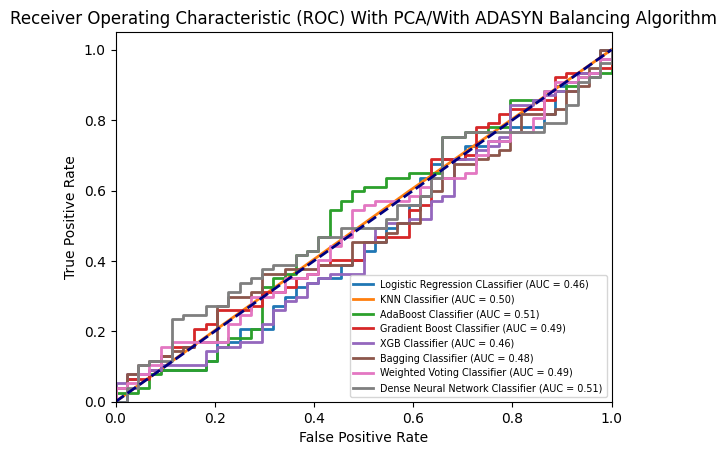

In [ ]:
models = {
    "Logistic Regression CLassifier": logistic_model,
    "KNN Classifier": knn_classifier,
    "AdaBoost Classifier": adaboost_classifier,
    "Gradient Boost Classifier": gradient_boosting_classifier,
    "XGB Classifier": xgb_model,
    "Bagging Classifier": bagging_classifier,
    "Weighted Voting Classifier": voting_classifier,
    "Dense Neural Network Classifier": neural_net_model
}
draw_ROC_curves(X_test, y_test, models, ' With PCA/With ADASYN Balancing Algorithm')

# Accuracy of the classifiers for different number of features.

In [ ]:
X = encoded_df.drop('DEPRESSED', axis=1)
y = encoded_df['DEPRESSED']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df_KBest10 = Select_KBest_Feature_Selection(X_train, y_train, 10)

df_KBest10.loc[:, 'DEPRESSED'] = y

X = encoded_df[df_KBest10.columns].drop('DEPRESSED', axis=1)
y = encoded_df['DEPRESSED']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nRESULTS AFTER DIMENSIONALITY REDUCTION WITH Select KBest")

['ENVSAT', 'POSSAT', 'FINSTR', 'ANXI', 'DEPRI', 'ABUSED', 'CHEAT', 'THREAT', 'INFER', 'CONFLICT']

RESULTS AFTER DIMENSIONALITY REDUCTION WITH Select KBest


In [ ]:
logistic_accuracy, logistic_model, logistic_duration_smote = LogisticRegression_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  82.64462809917356 %
Precision: 96.66666666666667 %
Recall (Sensitivity): 75.32467532467533 %
Specificity: 95.45454545454545 %
F1-score: 84.67153284671532 %
              precision    recall  f1-score   support

           0       0.69      0.95      0.80        44
           1       0.97      0.75      0.85        77

    accuracy                           0.83       121
   macro avg       0.83      0.85      0.82       121
weighted avg       0.87      0.83      0.83       121

True Positives: 58
True Negatives: 42
False Positives: 2
False Negatives: 19


In [ ]:
knn_accuracy_smote, knn_classifier, knn_duration_smote = KNN_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  80.99173553719008 %
Precision: 86.48648648648648 %
Recall (Sensitivity): 83.11688311688312 %
Specificity: 77.27272727272727 %
F1-score: 84.76821192052981 %
              precision    recall  f1-score   support

           0       0.72      0.77      0.75        44
           1       0.86      0.83      0.85        77

    accuracy                           0.81       121
   macro avg       0.79      0.80      0.80       121
weighted avg       0.81      0.81      0.81       121

True Positives: 64
True Negatives: 34
False Positives: 10
False Negatives: 13


In [ ]:
adaboost_accuracy, adaboost_classifier, adaboost_duration_smote = AdaBoost_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  82.64462809917356 %
Precision: 95.16129032258065 %
Recall (Sensitivity): 76.62337662337663 %
Specificity: 93.18181818181817 %
F1-score: 84.89208633093526 %
              precision    recall  f1-score   support

           0       0.69      0.93      0.80        44
           1       0.95      0.77      0.85        77

    accuracy                           0.83       121
   macro avg       0.82      0.85      0.82       121
weighted avg       0.86      0.83      0.83       121

True Positives: 59
True Negatives: 41
False Positives: 3
False Negatives: 18


In [ ]:
gradientboosting_accuracy, gradient_boosting_classifier, gradient_boosting_duration_smote = GradientBoosting_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  84.29752066115702 %
Precision: 93.93939393939394 %
Recall (Sensitivity): 80.51948051948052 %
Specificity: 90.9090909090909 %
F1-score: 86.71328671328672 %
              precision    recall  f1-score   support

           0       0.73      0.91      0.81        44
           1       0.94      0.81      0.87        77

    accuracy                           0.84       121
   macro avg       0.83      0.86      0.84       121
weighted avg       0.86      0.84      0.85       121

True Positives: 62
True Negatives: 40
False Positives: 4
False Negatives: 15


In [ ]:
xgb_accuracy, xgb_model, xgb_duration_smote = XGB_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  83.47107438016529 %
Precision: 91.30434782608695 %
Recall (Sensitivity): 81.81818181818183 %
Specificity: 86.36363636363636 %
F1-score: 86.3013698630137 %
              precision    recall  f1-score   support

           0       0.73      0.86      0.79        44
           1       0.91      0.82      0.86        77

    accuracy                           0.83       121
   macro avg       0.82      0.84      0.83       121
weighted avg       0.85      0.83      0.84       121

True Positives: 63
True Negatives: 38
False Positives: 6
False Negatives: 14


In [ ]:
bagging_accuracy, bagging_classifier, bagging_duration_smote = Bagging_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  83.47107438016529 %
Precision: 96.72131147540983 %
Recall (Sensitivity): 76.62337662337663 %
Specificity: 95.45454545454545 %
F1-score: 85.5072463768116 %
              precision    recall  f1-score   support

           0       0.70      0.95      0.81        44
           1       0.97      0.77      0.86        77

    accuracy                           0.83       121
   macro avg       0.83      0.86      0.83       121
weighted avg       0.87      0.83      0.84       121

True Positives: 59
True Negatives: 42
False Positives: 2
False Negatives: 18


In [ ]:
weightedvoting_accuracy, voting_classifier, voting_duration_smote = WeightedVoting_Classification(X_train_resampled, X_test, y_train_resampled, y_test,
                                                                           gradient_boosting_classifier, bagging_classifier, adaboost_classifier)

Accuracy:  85.12396694214877 %
Precision: 95.38461538461539 %
Recall (Sensitivity): 80.51948051948052 %
Specificity: 93.18181818181817 %
F1-score: 87.32394366197184 %
              precision    recall  f1-score   support

           0       0.73      0.93      0.82        44
           1       0.95      0.81      0.87        77

    accuracy                           0.85       121
   macro avg       0.84      0.87      0.85       121
weighted avg       0.87      0.85      0.85       121

True Positives: 62
True Negatives: 41
False Positives: 3
False Negatives: 15


In [ ]:
neural_net_accuracy, neural_net_model, neural_net_duration_smote = Neural_Net_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 64)                704       
                                                                 
 dense_53 (Dense)            (None, 32)                2080      
                                                                 
 dense_54 (Dense)            (None, 16)                528       
                                                                 
 dense_55 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3329 (13.00 KB)
Trainable params: 3329 (13.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
4/4 [==============================] - 0s 4ms/step - loss: 0.3418 - accuracy: 0.8512
Accuracy:  85.12396694214877 %
Precision: 96.82539682539682 %
Reca

In [ ]:
X = encoded_df.drop('DEPRESSED', axis=1)
y = encoded_df['DEPRESSED']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


df_KBest11 = Select_KBest_Feature_Selection(X_train, y_train, 11)

df_KBest11.loc[:, 'DEPRESSED'] = y

X = encoded_df[df_KBest11.columns].drop('DEPRESSED', axis=1)
y = encoded_df['DEPRESSED']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nRESULTS AFTER DIMENSIONALITY REDUCTION WITH Select KBest")

['ENVSAT', 'POSSAT', 'FINSTR', 'ANXI', 'DEPRI', 'ABUSED', 'CHEAT', 'THREAT', 'SUICIDE', 'INFER', 'CONFLICT']

RESULTS AFTER DIMENSIONALITY REDUCTION WITH Select KBest


In [ ]:
logistic_accuracy, logistic_model, logistic_duration_smote = LogisticRegression_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  83.47107438016529 %
Precision: 98.30508474576271 %
Recall (Sensitivity): 75.32467532467533 %
Specificity: 97.72727272727273 %
F1-score: 85.29411764705883 %
              precision    recall  f1-score   support

           0       0.69      0.98      0.81        44
           1       0.98      0.75      0.85        77

    accuracy                           0.83       121
   macro avg       0.84      0.87      0.83       121
weighted avg       0.88      0.83      0.84       121

True Positives: 58
True Negatives: 43
False Positives: 1
False Negatives: 19


In [ ]:
knn_accuracy_smote, knn_classifier, knn_duration_smote = KNN_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  80.99173553719008 %
Precision: 86.48648648648648 %
Recall (Sensitivity): 83.11688311688312 %
Specificity: 77.27272727272727 %
F1-score: 84.76821192052981 %
              precision    recall  f1-score   support

           0       0.72      0.77      0.75        44
           1       0.86      0.83      0.85        77

    accuracy                           0.81       121
   macro avg       0.79      0.80      0.80       121
weighted avg       0.81      0.81      0.81       121

True Positives: 64
True Negatives: 34
False Positives: 10
False Negatives: 13


In [ ]:
adaboost_accuracy, adaboost_classifier, adaboost_duration_smote = AdaBoost_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  84.29752066115702 %
Precision: 96.7741935483871 %
Recall (Sensitivity): 77.92207792207793 %
Specificity: 95.45454545454545 %
F1-score: 86.33093525179856 %
              precision    recall  f1-score   support

           0       0.71      0.95      0.82        44
           1       0.97      0.78      0.86        77

    accuracy                           0.84       121
   macro avg       0.84      0.87      0.84       121
weighted avg       0.87      0.84      0.85       121

True Positives: 60
True Negatives: 42
False Positives: 2
False Negatives: 17


In [ ]:
gradientboosting_accuracy, gradient_boosting_classifier, gradient_boosting_duration_smote = GradientBoosting_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  84.29752066115702 %
Precision: 93.93939393939394 %
Recall (Sensitivity): 80.51948051948052 %
Specificity: 90.9090909090909 %
F1-score: 86.71328671328672 %
              precision    recall  f1-score   support

           0       0.73      0.91      0.81        44
           1       0.94      0.81      0.87        77

    accuracy                           0.84       121
   macro avg       0.83      0.86      0.84       121
weighted avg       0.86      0.84      0.85       121

True Positives: 62
True Negatives: 40
False Positives: 4
False Negatives: 15


In [ ]:
xgb_accuracy, xgb_model, xgb_duration_smote = XGB_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  85.12396694214877 %
Precision: 95.38461538461539 %
Recall (Sensitivity): 80.51948051948052 %
Specificity: 93.18181818181817 %
F1-score: 87.32394366197184 %
              precision    recall  f1-score   support

           0       0.73      0.93      0.82        44
           1       0.95      0.81      0.87        77

    accuracy                           0.85       121
   macro avg       0.84      0.87      0.85       121
weighted avg       0.87      0.85      0.85       121

True Positives: 62
True Negatives: 41
False Positives: 3
False Negatives: 15


In [ ]:
bagging_accuracy, bagging_classifier, bagging_duration_smote = Bagging_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  84.29752066115702 %
Precision: 96.7741935483871 %
Recall (Sensitivity): 77.92207792207793 %
Specificity: 95.45454545454545 %
F1-score: 86.33093525179856 %
              precision    recall  f1-score   support

           0       0.71      0.95      0.82        44
           1       0.97      0.78      0.86        77

    accuracy                           0.84       121
   macro avg       0.84      0.87      0.84       121
weighted avg       0.87      0.84      0.85       121

True Positives: 60
True Negatives: 42
False Positives: 2
False Negatives: 17


In [ ]:
weightedvoting_accuracy, voting_classifier, voting_duration_smote = WeightedVoting_Classification(X_train_resampled, X_test, y_train_resampled, y_test,
                                                                           gradient_boosting_classifier, bagging_classifier, adaboost_classifier)

Accuracy:  85.12396694214877 %
Precision: 95.38461538461539 %
Recall (Sensitivity): 80.51948051948052 %
Specificity: 93.18181818181817 %
F1-score: 87.32394366197184 %
              precision    recall  f1-score   support

           0       0.73      0.93      0.82        44
           1       0.95      0.81      0.87        77

    accuracy                           0.85       121
   macro avg       0.84      0.87      0.85       121
weighted avg       0.87      0.85      0.85       121

True Positives: 62
True Negatives: 41
False Positives: 3
False Negatives: 15


In [ ]:
neural_net_accuracy, neural_net_model, neural_net_duration_smote = Neural_Net_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 64)                768       
                                                                 
 dense_57 (Dense)            (None, 32)                2080      
                                                                 
 dense_58 (Dense)            (None, 16)                528       
                                                                 
 dense_59 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3393 (13.25 KB)
Trainable params: 3393 (13.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
4/4 [==============================] - 0s 5ms/step - loss: 0.3070 - accuracy: 0.8678
Accuracy:  86.77685950413223 %
Precision: 92.95774647887323 %
Reca

In [ ]:
X = encoded_df.drop('DEPRESSED', axis=1)
y = encoded_df['DEPRESSED']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


df_KBest12 = Select_KBest_Feature_Selection(X_train, y_train, 12)

df_KBest12.loc[:, 'DEPRESSED'] = y

X = encoded_df[df_KBest12.columns].drop('DEPRESSED', axis=1)
y = encoded_df['DEPRESSED']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nRESULTS AFTER DIMENSIONALITY REDUCTION WITH Select KBest")

['ENVSAT', 'POSSAT', 'FINSTR', 'INSOM', 'ANXI', 'DEPRI', 'ABUSED', 'CHEAT', 'THREAT', 'SUICIDE', 'INFER', 'CONFLICT']

RESULTS AFTER DIMENSIONALITY REDUCTION WITH Select KBest


In [ ]:
logistic_accuracy, logistic_model, logistic_duration_smote = LogisticRegression_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  84.29752066115702 %
Precision: 96.7741935483871 %
Recall (Sensitivity): 77.92207792207793 %
Specificity: 95.45454545454545 %
F1-score: 86.33093525179856 %
              precision    recall  f1-score   support

           0       0.71      0.95      0.82        44
           1       0.97      0.78      0.86        77

    accuracy                           0.84       121
   macro avg       0.84      0.87      0.84       121
weighted avg       0.87      0.84      0.85       121

True Positives: 60
True Negatives: 42
False Positives: 2
False Negatives: 17


In [ ]:
knn_accuracy_smote, knn_classifier, knn_duration_smote = KNN_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  82.64462809917356 %
Precision: 85.8974358974359 %
Recall (Sensitivity): 87.01298701298701 %
Specificity: 75.0 %
F1-score: 86.45161290322582 %
              precision    recall  f1-score   support

           0       0.77      0.75      0.76        44
           1       0.86      0.87      0.86        77

    accuracy                           0.83       121
   macro avg       0.81      0.81      0.81       121
weighted avg       0.83      0.83      0.83       121

True Positives: 67
True Negatives: 33
False Positives: 11
False Negatives: 10


In [ ]:
adaboost_accuracy, adaboost_classifier, adaboost_duration_smote = AdaBoost_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  85.9504132231405 %
Precision: 96.875 %
Recall (Sensitivity): 80.51948051948052 %
Specificity: 95.45454545454545 %
F1-score: 87.94326241134752 %
              precision    recall  f1-score   support

           0       0.74      0.95      0.83        44
           1       0.97      0.81      0.88        77

    accuracy                           0.86       121
   macro avg       0.85      0.88      0.86       121
weighted avg       0.88      0.86      0.86       121

True Positives: 62
True Negatives: 42
False Positives: 2
False Negatives: 15


In [ ]:
gradientboosting_accuracy, gradient_boosting_classifier, gradient_boosting_duration_smote = GradientBoosting_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  85.12396694214877 %
Precision: 96.82539682539682 %
Recall (Sensitivity): 79.22077922077922 %
Specificity: 95.45454545454545 %
F1-score: 87.14285714285714 %
              precision    recall  f1-score   support

           0       0.72      0.95      0.82        44
           1       0.97      0.79      0.87        77

    accuracy                           0.85       121
   macro avg       0.85      0.87      0.85       121
weighted avg       0.88      0.85      0.85       121

True Positives: 61
True Negatives: 42
False Positives: 2
False Negatives: 16


In [ ]:
xgb_accuracy, xgb_model, xgb_duration_smote = XGB_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  83.47107438016529 %
Precision: 90.14084507042254 %
Recall (Sensitivity): 83.11688311688312 %
Specificity: 84.0909090909091 %
F1-score: 86.4864864864865 %
              precision    recall  f1-score   support

           0       0.74      0.84      0.79        44
           1       0.90      0.83      0.86        77

    accuracy                           0.83       121
   macro avg       0.82      0.84      0.83       121
weighted avg       0.84      0.83      0.84       121

True Positives: 64
True Negatives: 37
False Positives: 7
False Negatives: 13


In [ ]:
bagging_accuracy, bagging_classifier, bagging_duration_smote = Bagging_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  84.29752066115702 %
Precision: 98.33333333333333 %
Recall (Sensitivity): 76.62337662337663 %
Specificity: 97.72727272727273 %
F1-score: 86.13138686131387 %
              precision    recall  f1-score   support

           0       0.70      0.98      0.82        44
           1       0.98      0.77      0.86        77

    accuracy                           0.84       121
   macro avg       0.84      0.87      0.84       121
weighted avg       0.88      0.84      0.85       121

True Positives: 59
True Negatives: 43
False Positives: 1
False Negatives: 18


In [ ]:
weightedvoting_accuracy, voting_classifier, voting_duration_smote = WeightedVoting_Classification(X_train_resampled, X_test, y_train_resampled, y_test,
                                                                           gradient_boosting_classifier, bagging_classifier, adaboost_classifier)

Accuracy:  84.29752066115702 %
Precision: 96.7741935483871 %
Recall (Sensitivity): 77.92207792207793 %
Specificity: 95.45454545454545 %
F1-score: 86.33093525179856 %
              precision    recall  f1-score   support

           0       0.71      0.95      0.82        44
           1       0.97      0.78      0.86        77

    accuracy                           0.84       121
   macro avg       0.84      0.87      0.84       121
weighted avg       0.87      0.84      0.85       121

True Positives: 60
True Negatives: 42
False Positives: 2
False Negatives: 17


In [ ]:
neural_net_accuracy, neural_net_model, neural_net_duration_smote = Neural_Net_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 64)                832       
                                                                 
 dense_61 (Dense)            (None, 32)                2080      
                                                                 
 dense_62 (Dense)            (None, 16)                528       
                                                                 
 dense_63 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3457 (13.50 KB)
Trainable params: 3457 (13.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
4/4 [==============================] - 1s 10ms/step - loss: 0.3080 - accuracy: 0.8595
Accuracy:  85.9504132231405 %
Precision: 95.45454545454545 %
Reca

In [ ]:
X = encoded_df.drop('DEPRESSED', axis=1)
y = encoded_df['DEPRESSED']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


df_KBest13 = Select_KBest_Feature_Selection(X_train, y_train, 13)

df_KBest13.loc[:, 'DEPRESSED'] = y

X = encoded_df[df_KBest13.columns].drop('DEPRESSED', axis=1)
y = encoded_df['DEPRESSED']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nRESULTS AFTER DIMENSIONALITY REDUCTION WITH Select KBest")

['ENVSAT', 'POSSAT', 'FINSTR', 'INSOM', 'ANXI', 'DEPRI', 'ABUSED', 'CHEAT', 'THREAT', 'SUICIDE', 'INFER', 'CONFLICT', 'LOST']

RESULTS AFTER DIMENSIONALITY REDUCTION WITH Select KBest


In [ ]:
logistic_accuracy, logistic_model, logistic_duration_smote = LogisticRegression_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  90.9090909090909 %
Precision: 98.52941176470588 %
Recall (Sensitivity): 87.01298701298701 %
Specificity: 97.72727272727273 %
F1-score: 92.41379310344828 %
              precision    recall  f1-score   support

           0       0.81      0.98      0.89        44
           1       0.99      0.87      0.92        77

    accuracy                           0.91       121
   macro avg       0.90      0.92      0.91       121
weighted avg       0.92      0.91      0.91       121

True Positives: 67
True Negatives: 43
False Positives: 1
False Negatives: 10


In [ ]:
knn_accuracy_smote, knn_classifier, knn_duration_smote = KNN_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  85.12396694214877 %
Precision: 90.41095890410958 %
Recall (Sensitivity): 85.71428571428571 %
Specificity: 84.0909090909091 %
F1-score: 88.0 %
              precision    recall  f1-score   support

           0       0.77      0.84      0.80        44
           1       0.90      0.86      0.88        77

    accuracy                           0.85       121
   macro avg       0.84      0.85      0.84       121
weighted avg       0.86      0.85      0.85       121

True Positives: 66
True Negatives: 37
False Positives: 7
False Negatives: 11


In [ ]:
adaboost_accuracy, adaboost_classifier, adaboost_duration_smote = AdaBoost_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  90.08264462809917 %
Precision: 97.10144927536231 %
Recall (Sensitivity): 87.01298701298701 %
Specificity: 95.45454545454545 %
F1-score: 91.78082191780821 %
              precision    recall  f1-score   support

           0       0.81      0.95      0.88        44
           1       0.97      0.87      0.92        77

    accuracy                           0.90       121
   macro avg       0.89      0.91      0.90       121
weighted avg       0.91      0.90      0.90       121

True Positives: 67
True Negatives: 42
False Positives: 2
False Negatives: 10


In [ ]:
gradientboosting_accuracy, gradient_boosting_classifier, gradient_boosting_duration_smote = GradientBoosting_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  87.60330578512396 %
Precision: 95.58823529411765 %
Recall (Sensitivity): 84.4155844155844 %
Specificity: 93.18181818181817 %
F1-score: 89.6551724137931 %
              precision    recall  f1-score   support

           0       0.77      0.93      0.85        44
           1       0.96      0.84      0.90        77

    accuracy                           0.88       121
   macro avg       0.86      0.89      0.87       121
weighted avg       0.89      0.88      0.88       121

True Positives: 65
True Negatives: 41
False Positives: 3
False Negatives: 12


In [ ]:
xgb_accuracy, xgb_model, xgb_duration_smote = XGB_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  87.60330578512396 %
Precision: 95.58823529411765 %
Recall (Sensitivity): 84.4155844155844 %
Specificity: 93.18181818181817 %
F1-score: 89.6551724137931 %
              precision    recall  f1-score   support

           0       0.77      0.93      0.85        44
           1       0.96      0.84      0.90        77

    accuracy                           0.88       121
   macro avg       0.86      0.89      0.87       121
weighted avg       0.89      0.88      0.88       121

True Positives: 65
True Negatives: 41
False Positives: 3
False Negatives: 12


In [ ]:
bagging_accuracy, bagging_classifier, bagging_duration_smote = Bagging_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  89.25619834710744 %
Precision: 98.48484848484848 %
Recall (Sensitivity): 84.4155844155844 %
Specificity: 97.72727272727273 %
F1-score: 90.9090909090909 %
              precision    recall  f1-score   support

           0       0.78      0.98      0.87        44
           1       0.98      0.84      0.91        77

    accuracy                           0.89       121
   macro avg       0.88      0.91      0.89       121
weighted avg       0.91      0.89      0.89       121

True Positives: 65
True Negatives: 43
False Positives: 1
False Negatives: 12


In [ ]:
weightedvoting_accuracy, voting_classifier, voting_duration_smote = WeightedVoting_Classification(X_train_resampled, X_test, y_train_resampled, y_test,
                                                                           gradient_boosting_classifier, bagging_classifier, adaboost_classifier)

Accuracy:  89.25619834710744 %
Precision: 97.05882352941177 %
Recall (Sensitivity): 85.71428571428571 %
Specificity: 95.45454545454545 %
F1-score: 91.03448275862068 %
              precision    recall  f1-score   support

           0       0.79      0.95      0.87        44
           1       0.97      0.86      0.91        77

    accuracy                           0.89       121
   macro avg       0.88      0.91      0.89       121
weighted avg       0.91      0.89      0.89       121

True Positives: 66
True Negatives: 42
False Positives: 2
False Negatives: 11


In [ ]:
neural_net_accuracy, neural_net_model, neural_net_duration_smote = Neural_Net_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 64)                896       
                                                                 
 dense_65 (Dense)            (None, 32)                2080      
                                                                 
 dense_66 (Dense)            (None, 16)                528       
                                                                 
 dense_67 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3521 (13.75 KB)
Trainable params: 3521 (13.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
4/4 [==============================] - 0s 4ms/step - loss: 0.2060 - accuracy: 0.9174
Accuracy:  91.73553719008265 %
Precision: 95.8904109589041 %
Recal

In [ ]:
X = encoded_df.drop('DEPRESSED', axis=1)
y = encoded_df['DEPRESSED']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


df_KBest14 = Select_KBest_Feature_Selection(X_train, y_train, 14)

df_KBest14.loc[:, 'DEPRESSED'] = y

X = encoded_df[df_KBest14.columns].drop('DEPRESSED', axis=1)
y = encoded_df['DEPRESSED']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nRESULTS AFTER DIMENSIONALITY REDUCTION WITH Select KBest")

['ENVSAT', 'POSSAT', 'FINSTR', 'DEBT', 'INSOM', 'ANXI', 'DEPRI', 'ABUSED', 'CHEAT', 'THREAT', 'SUICIDE', 'INFER', 'CONFLICT', 'LOST']

RESULTS AFTER DIMENSIONALITY REDUCTION WITH Select KBest


In [ ]:
logistic_accuracy, logistic_model, logistic_duration_smote = LogisticRegression_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  90.9090909090909 %
Precision: 98.52941176470588 %
Recall (Sensitivity): 87.01298701298701 %
Specificity: 97.72727272727273 %
F1-score: 92.41379310344828 %
              precision    recall  f1-score   support

           0       0.81      0.98      0.89        44
           1       0.99      0.87      0.92        77

    accuracy                           0.91       121
   macro avg       0.90      0.92      0.91       121
weighted avg       0.92      0.91      0.91       121

True Positives: 67
True Negatives: 43
False Positives: 1
False Negatives: 10


In [ ]:
knn_accuracy_smote, knn_classifier, knn_duration_smote = KNN_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  84.29752066115702 %
Precision: 91.42857142857143 %
Recall (Sensitivity): 83.11688311688312 %
Specificity: 86.36363636363636 %
F1-score: 87.07482993197279 %
              precision    recall  f1-score   support

           0       0.75      0.86      0.80        44
           1       0.91      0.83      0.87        77

    accuracy                           0.84       121
   macro avg       0.83      0.85      0.84       121
weighted avg       0.85      0.84      0.85       121

True Positives: 64
True Negatives: 38
False Positives: 6
False Negatives: 13


In [ ]:
adaboost_accuracy, adaboost_classifier, adaboost_duration_smote = AdaBoost_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  90.9090909090909 %
Precision: 98.52941176470588 %
Recall (Sensitivity): 87.01298701298701 %
Specificity: 97.72727272727273 %
F1-score: 92.41379310344828 %
              precision    recall  f1-score   support

           0       0.81      0.98      0.89        44
           1       0.99      0.87      0.92        77

    accuracy                           0.91       121
   macro avg       0.90      0.92      0.91       121
weighted avg       0.92      0.91      0.91       121

True Positives: 67
True Negatives: 43
False Positives: 1
False Negatives: 10


In [ ]:
gradientboosting_accuracy, gradient_boosting_classifier, gradient_boosting_duration_smote = GradientBoosting_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  88.42975206611571 %
Precision: 97.01492537313433 %
Recall (Sensitivity): 84.4155844155844 %
Specificity: 95.45454545454545 %
F1-score: 90.27777777777779 %
              precision    recall  f1-score   support

           0       0.78      0.95      0.86        44
           1       0.97      0.84      0.90        77

    accuracy                           0.88       121
   macro avg       0.87      0.90      0.88       121
weighted avg       0.90      0.88      0.89       121

True Positives: 65
True Negatives: 42
False Positives: 2
False Negatives: 12


In [ ]:
xgb_accuracy, xgb_model, xgb_duration_smote = XGB_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  85.9504132231405 %
Precision: 94.11764705882352 %
Recall (Sensitivity): 83.11688311688312 %
Specificity: 90.9090909090909 %
F1-score: 88.27586206896552 %
              precision    recall  f1-score   support

           0       0.75      0.91      0.82        44
           1       0.94      0.83      0.88        77

    accuracy                           0.86       121
   macro avg       0.85      0.87      0.85       121
weighted avg       0.87      0.86      0.86       121

True Positives: 64
True Negatives: 40
False Positives: 4
False Negatives: 13


In [ ]:
bagging_accuracy, bagging_classifier, bagging_duration_smote = Bagging_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  90.08264462809917 %
Precision: 100.0 %
Recall (Sensitivity): 84.4155844155844 %
Specificity: 100.0 %
F1-score: 91.54929577464789 %
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        44
           1       1.00      0.84      0.92        77

    accuracy                           0.90       121
   macro avg       0.89      0.92      0.90       121
weighted avg       0.92      0.90      0.90       121

True Positives: 65
True Negatives: 44
False Positives: 0
False Negatives: 12


In [ ]:
weightedvoting_accuracy, voting_classifier, voting_duration_smote = WeightedVoting_Classification(X_train_resampled, X_test, y_train_resampled, y_test,
                                                                           gradient_boosting_classifier, bagging_classifier, adaboost_classifier)

Accuracy:  90.08264462809917 %
Precision: 97.10144927536231 %
Recall (Sensitivity): 87.01298701298701 %
Specificity: 95.45454545454545 %
F1-score: 91.78082191780821 %
              precision    recall  f1-score   support

           0       0.81      0.95      0.88        44
           1       0.97      0.87      0.92        77

    accuracy                           0.90       121
   macro avg       0.89      0.91      0.90       121
weighted avg       0.91      0.90      0.90       121

True Positives: 67
True Negatives: 42
False Positives: 2
False Negatives: 10


In [ ]:
neural_net_accuracy, neural_net_model, neural_net_duration_smote = Neural_Net_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 64)                960       
                                                                 
 dense_69 (Dense)            (None, 32)                2080      
                                                                 
 dense_70 (Dense)            (None, 16)                528       
                                                                 
 dense_71 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3585 (14.00 KB)
Trainable params: 3585 (14.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
4/4 [==============================] - 0s 5ms/step - loss: 0.2278 - accuracy: 0.8926
Accuracy:  89.25619834710744 %
Precision: 97.05882352941177 %
Reca

#Accuracy measurements with mRMR

In [ ]:
X = encoded_df.drop('DEPRESSED', axis=1)
y = encoded_df['DEPRESSED']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


df_mRMR10 = mRMR_Feature_Selection(X_train, y_train, 10)

df_mRMR10.loc[:, 'DEPRESSED'] = y

X = encoded_df[df_mRMR10.columns].drop('DEPRESSED', axis=1)
y = encoded_df['DEPRESSED']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nRESULTS AFTER DIMENSIONALITY REDUCTION WITH Select mRMR")

     DEPRESSED  AGERNG  GENDER  EDU  PROF  MARSTS  RESDPL  LIVWTH  ENVSAT  \
9            1       1       1    0     4       2       0       0       1   
377          1       0       0    1     4       2       0       0       0   
526          0       1       1    0     4       2       0       0       1   
188          0       2       1    0     3       2       0       0       1   
131          0       2       1    0     0       1       0       0       1   
..         ...     ...     ...  ...   ...     ...     ...     ...     ...   
71           0       1       1    0     4       2       1       0       1   
106          0       0       0    1     4       2       2       0       1   
270          0       2       1    2     5       2       0       0       0   
435          0       1       1    1     4       2       1       0       1   
102          0       1       1    2     4       2       1       1       0   

     POSSAT  ...  WRKPRE  ANXI  DEPRI  ABUSED  CHEAT  THREAT  SUICIDE  INFE

<ipython-input-299-9427a9754a94>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mRMR10.loc[:, 'DEPRESSED'] = y


In [ ]:
logistic_accuracy, logistic_model, logistic_duration_smote = LogisticRegression_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  87.60330578512396 %
Precision: 95.58823529411765 %
Recall (Sensitivity): 84.4155844155844 %
Specificity: 93.18181818181817 %
F1-score: 89.6551724137931 %
              precision    recall  f1-score   support

           0       0.77      0.93      0.85        44
           1       0.96      0.84      0.90        77

    accuracy                           0.88       121
   macro avg       0.86      0.89      0.87       121
weighted avg       0.89      0.88      0.88       121

True Positives: 65
True Negatives: 41
False Positives: 3
False Negatives: 12


In [ ]:
knn_accuracy_smote, knn_classifier, knn_duration_smote = KNN_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  83.47107438016529 %
Precision: 89.04109589041096 %
Recall (Sensitivity): 84.4155844155844 %
Specificity: 81.81818181818183 %
F1-score: 86.66666666666666 %
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        44
           1       0.89      0.84      0.87        77

    accuracy                           0.83       121
   macro avg       0.82      0.83      0.82       121
weighted avg       0.84      0.83      0.84       121

True Positives: 65
True Negatives: 36
False Positives: 8
False Negatives: 12


In [ ]:
adaboost_accuracy, adaboost_classifier, adaboost_duration_smote = AdaBoost_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  86.77685950413223 %
Precision: 94.20289855072464 %
Recall (Sensitivity): 84.4155844155844 %
Specificity: 90.9090909090909 %
F1-score: 89.04109589041096 %
              precision    recall  f1-score   support

           0       0.77      0.91      0.83        44
           1       0.94      0.84      0.89        77

    accuracy                           0.87       121
   macro avg       0.86      0.88      0.86       121
weighted avg       0.88      0.87      0.87       121

True Positives: 65
True Negatives: 40
False Positives: 4
False Negatives: 12


In [ ]:
gradientboosting_accuracy, gradient_boosting_classifier, gradient_boosting_duration_smote = GradientBoosting_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  84.29752066115702 %
Precision: 93.93939393939394 %
Recall (Sensitivity): 80.51948051948052 %
Specificity: 90.9090909090909 %
F1-score: 86.71328671328672 %
              precision    recall  f1-score   support

           0       0.73      0.91      0.81        44
           1       0.94      0.81      0.87        77

    accuracy                           0.84       121
   macro avg       0.83      0.86      0.84       121
weighted avg       0.86      0.84      0.85       121

True Positives: 62
True Negatives: 40
False Positives: 4
False Negatives: 15


In [ ]:
xgb_accuracy, xgb_model, xgb_duration_smote = XGB_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  83.47107438016529 %
Precision: 91.30434782608695 %
Recall (Sensitivity): 81.81818181818183 %
Specificity: 86.36363636363636 %
F1-score: 86.3013698630137 %
              precision    recall  f1-score   support

           0       0.73      0.86      0.79        44
           1       0.91      0.82      0.86        77

    accuracy                           0.83       121
   macro avg       0.82      0.84      0.83       121
weighted avg       0.85      0.83      0.84       121

True Positives: 63
True Negatives: 38
False Positives: 6
False Negatives: 14


In [ ]:
bagging_accuracy, bagging_classifier, bagging_duration_smote = Bagging_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  87.60330578512396 %
Precision: 96.96969696969697 %
Recall (Sensitivity): 83.11688311688312 %
Specificity: 95.45454545454545 %
F1-score: 89.5104895104895 %
              precision    recall  f1-score   support

           0       0.76      0.95      0.85        44
           1       0.97      0.83      0.90        77

    accuracy                           0.88       121
   macro avg       0.87      0.89      0.87       121
weighted avg       0.89      0.88      0.88       121

True Positives: 64
True Negatives: 42
False Positives: 2
False Negatives: 13


In [ ]:
weightedvoting_accuracy, voting_classifier, voting_duration_smote = WeightedVoting_Classification(X_train_resampled, X_test, y_train_resampled, y_test,
                                                                           gradient_boosting_classifier, bagging_classifier, adaboost_classifier)

Accuracy:  87.60330578512396 %
Precision: 95.58823529411765 %
Recall (Sensitivity): 84.4155844155844 %
Specificity: 93.18181818181817 %
F1-score: 89.6551724137931 %
              precision    recall  f1-score   support

           0       0.77      0.93      0.85        44
           1       0.96      0.84      0.90        77

    accuracy                           0.88       121
   macro avg       0.86      0.89      0.87       121
weighted avg       0.89      0.88      0.88       121

True Positives: 65
True Negatives: 41
False Positives: 3
False Negatives: 12


In [ ]:
neural_net_accuracy, neural_net_model, neural_net_duration_smote = Neural_Net_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 64)                704       
                                                                 
 dense_73 (Dense)            (None, 32)                2080      
                                                                 
 dense_74 (Dense)            (None, 16)                528       
                                                                 
 dense_75 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3329 (13.00 KB)
Trainable params: 3329 (13.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
4/4 [==============================] - 1s 7ms/step - loss: 0.3047 - accuracy: 0.8678
Accuracy:  86.77685950413223 %
Precision: 92.95774647887323 %
Reca

In [ ]:
X = encoded_df.drop('DEPRESSED', axis=1)
y = encoded_df['DEPRESSED']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


df_mRMR11 = mRMR_Feature_Selection(X_train, y_train, 11)

df_mRMR11.loc[:, 'DEPRESSED'] = y

X = encoded_df[df_mRMR11.columns].drop('DEPRESSED', axis=1)
y = encoded_df['DEPRESSED']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nRESULTS AFTER DIMENSIONALITY REDUCTION WITH Select mRMR")

     DEPRESSED  AGERNG  GENDER  EDU  PROF  MARSTS  RESDPL  LIVWTH  ENVSAT  \
9            1       1       1    0     4       2       0       0       1   
377          1       0       0    1     4       2       0       0       0   
526          0       1       1    0     4       2       0       0       1   
188          0       2       1    0     3       2       0       0       1   
131          0       2       1    0     0       1       0       0       1   
..         ...     ...     ...  ...   ...     ...     ...     ...     ...   
71           0       1       1    0     4       2       1       0       1   
106          0       0       0    1     4       2       2       0       1   
270          0       2       1    2     5       2       0       0       0   
435          0       1       1    1     4       2       1       0       1   
102          0       1       1    2     4       2       1       1       0   

     POSSAT  ...  WRKPRE  ANXI  DEPRI  ABUSED  CHEAT  THREAT  SUICIDE  INFE

<ipython-input-308-c501c52a8bf1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mRMR11.loc[:, 'DEPRESSED'] = y


In [ ]:
logistic_accuracy, logistic_model, logistic_duration_smote = LogisticRegression_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  85.9504132231405 %
Precision: 95.45454545454545 %
Recall (Sensitivity): 81.81818181818183 %
Specificity: 93.18181818181817 %
F1-score: 88.1118881118881 %
              precision    recall  f1-score   support

           0       0.75      0.93      0.83        44
           1       0.95      0.82      0.88        77

    accuracy                           0.86       121
   macro avg       0.85      0.88      0.85       121
weighted avg       0.88      0.86      0.86       121

True Positives: 63
True Negatives: 41
False Positives: 3
False Negatives: 14


In [ ]:
knn_accuracy_smote, knn_classifier, knn_duration_smote = KNN_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  83.47107438016529 %
Precision: 89.04109589041096 %
Recall (Sensitivity): 84.4155844155844 %
Specificity: 81.81818181818183 %
F1-score: 86.66666666666666 %
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        44
           1       0.89      0.84      0.87        77

    accuracy                           0.83       121
   macro avg       0.82      0.83      0.82       121
weighted avg       0.84      0.83      0.84       121

True Positives: 65
True Negatives: 36
False Positives: 8
False Negatives: 12


In [ ]:
adaboost_accuracy, adaboost_classifier, adaboost_duration_smote = AdaBoost_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  86.77685950413223 %
Precision: 96.92307692307692 %
Recall (Sensitivity): 81.81818181818183 %
Specificity: 95.45454545454545 %
F1-score: 88.73239436619718 %
              precision    recall  f1-score   support

           0       0.75      0.95      0.84        44
           1       0.97      0.82      0.89        77

    accuracy                           0.87       121
   macro avg       0.86      0.89      0.86       121
weighted avg       0.89      0.87      0.87       121

True Positives: 63
True Negatives: 42
False Positives: 2
False Negatives: 14


In [ ]:
gradientboosting_accuracy, gradient_boosting_classifier, gradient_boosting_duration_smote = GradientBoosting_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  84.29752066115702 %
Precision: 93.93939393939394 %
Recall (Sensitivity): 80.51948051948052 %
Specificity: 90.9090909090909 %
F1-score: 86.71328671328672 %
              precision    recall  f1-score   support

           0       0.73      0.91      0.81        44
           1       0.94      0.81      0.87        77

    accuracy                           0.84       121
   macro avg       0.83      0.86      0.84       121
weighted avg       0.86      0.84      0.85       121

True Positives: 62
True Negatives: 40
False Positives: 4
False Negatives: 15


In [ ]:
xgb_accuracy, xgb_model, xgb_duration_smote = XGB_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  85.9504132231405 %
Precision: 95.45454545454545 %
Recall (Sensitivity): 81.81818181818183 %
Specificity: 93.18181818181817 %
F1-score: 88.1118881118881 %
              precision    recall  f1-score   support

           0       0.75      0.93      0.83        44
           1       0.95      0.82      0.88        77

    accuracy                           0.86       121
   macro avg       0.85      0.88      0.85       121
weighted avg       0.88      0.86      0.86       121

True Positives: 63
True Negatives: 41
False Positives: 3
False Negatives: 14


In [ ]:
bagging_accuracy, bagging_classifier, bagging_duration_smote = Bagging_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  88.42975206611571 %
Precision: 97.01492537313433 %
Recall (Sensitivity): 84.4155844155844 %
Specificity: 95.45454545454545 %
F1-score: 90.27777777777779 %
              precision    recall  f1-score   support

           0       0.78      0.95      0.86        44
           1       0.97      0.84      0.90        77

    accuracy                           0.88       121
   macro avg       0.87      0.90      0.88       121
weighted avg       0.90      0.88      0.89       121

True Positives: 65
True Negatives: 42
False Positives: 2
False Negatives: 12


In [ ]:
weightedvoting_accuracy, voting_classifier, voting_duration_smote = WeightedVoting_Classification(X_train_resampled, X_test, y_train_resampled, y_test,
                                                                           gradient_boosting_classifier, bagging_classifier, adaboost_classifier)

Accuracy:  87.60330578512396 %
Precision: 95.58823529411765 %
Recall (Sensitivity): 84.4155844155844 %
Specificity: 93.18181818181817 %
F1-score: 89.6551724137931 %
              precision    recall  f1-score   support

           0       0.77      0.93      0.85        44
           1       0.96      0.84      0.90        77

    accuracy                           0.88       121
   macro avg       0.86      0.89      0.87       121
weighted avg       0.89      0.88      0.88       121

True Positives: 65
True Negatives: 41
False Positives: 3
False Negatives: 12


In [ ]:
neural_net_accuracy, neural_net_model, neural_net_duration_smote = Neural_Net_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, 64)                768       
                                                                 
 dense_77 (Dense)            (None, 32)                2080      
                                                                 
 dense_78 (Dense)            (None, 16)                528       
                                                                 
 dense_79 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3393 (13.25 KB)
Trainable params: 3393 (13.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
4/4 [==============================] - 0s 4ms/step - loss: 0.3141 - accuracy: 0.8678
Accuracy:  86.77685950413223 %
Precision: 92.95774647887323 %
Reca

In [ ]:
X = encoded_df.drop('DEPRESSED', axis=1)
y = encoded_df['DEPRESSED']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


df_mRMR12 = mRMR_Feature_Selection(X_train, y_train, 12)

df_mRMR12.loc[:, 'DEPRESSED'] = y

X = encoded_df[df_mRMR12.columns].drop('DEPRESSED', axis=1)
y = encoded_df['DEPRESSED']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nRESULTS AFTER DIMENSIONALITY REDUCTION WITH Select mRMR")

     DEPRESSED  AGERNG  GENDER  EDU  PROF  MARSTS  RESDPL  LIVWTH  ENVSAT  \
9            1       1       1    0     4       2       0       0       1   
377          1       0       0    1     4       2       0       0       0   
526          0       1       1    0     4       2       0       0       1   
188          0       2       1    0     3       2       0       0       1   
131          0       2       1    0     0       1       0       0       1   
..         ...     ...     ...  ...   ...     ...     ...     ...     ...   
71           0       1       1    0     4       2       1       0       1   
106          0       0       0    1     4       2       2       0       1   
270          0       2       1    2     5       2       0       0       0   
435          0       1       1    1     4       2       1       0       1   
102          0       1       1    2     4       2       1       1       0   

     POSSAT  ...  WRKPRE  ANXI  DEPRI  ABUSED  CHEAT  THREAT  SUICIDE  INFE

<ipython-input-317-24cd24c2cbd7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mRMR12.loc[:, 'DEPRESSED'] = y


In [ ]:
logistic_accuracy, logistic_model, logistic_duration_smote = LogisticRegression_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  88.42975206611571 %
Precision: 97.01492537313433 %
Recall (Sensitivity): 84.4155844155844 %
Specificity: 95.45454545454545 %
F1-score: 90.27777777777779 %
              precision    recall  f1-score   support

           0       0.78      0.95      0.86        44
           1       0.97      0.84      0.90        77

    accuracy                           0.88       121
   macro avg       0.87      0.90      0.88       121
weighted avg       0.90      0.88      0.89       121

True Positives: 65
True Negatives: 42
False Positives: 2
False Negatives: 12


In [ ]:
knn_accuracy_smote, knn_classifier, knn_duration_smote = KNN_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  80.16528925619835 %
Precision: 86.3013698630137 %
Recall (Sensitivity): 81.81818181818183 %
Specificity: 77.27272727272727 %
F1-score: 84.00000000000001 %
              precision    recall  f1-score   support

           0       0.71      0.77      0.74        44
           1       0.86      0.82      0.84        77

    accuracy                           0.80       121
   macro avg       0.79      0.80      0.79       121
weighted avg       0.81      0.80      0.80       121

True Positives: 63
True Negatives: 34
False Positives: 10
False Negatives: 14


In [ ]:
adaboost_accuracy, adaboost_classifier, adaboost_duration_smote = AdaBoost_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  87.60330578512396 %
Precision: 95.58823529411765 %
Recall (Sensitivity): 84.4155844155844 %
Specificity: 93.18181818181817 %
F1-score: 89.6551724137931 %
              precision    recall  f1-score   support

           0       0.77      0.93      0.85        44
           1       0.96      0.84      0.90        77

    accuracy                           0.88       121
   macro avg       0.86      0.89      0.87       121
weighted avg       0.89      0.88      0.88       121

True Positives: 65
True Negatives: 41
False Positives: 3
False Negatives: 12


In [ ]:
gradientboosting_accuracy, gradient_boosting_classifier, gradient_boosting_duration_smote = GradientBoosting_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  86.77685950413223 %
Precision: 94.20289855072464 %
Recall (Sensitivity): 84.4155844155844 %
Specificity: 90.9090909090909 %
F1-score: 89.04109589041096 %
              precision    recall  f1-score   support

           0       0.77      0.91      0.83        44
           1       0.94      0.84      0.89        77

    accuracy                           0.87       121
   macro avg       0.86      0.88      0.86       121
weighted avg       0.88      0.87      0.87       121

True Positives: 65
True Negatives: 40
False Positives: 4
False Negatives: 12


In [ ]:
xgb_accuracy, xgb_model, xgb_duration_smote = XGB_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  85.9504132231405 %
Precision: 91.66666666666666 %
Recall (Sensitivity): 85.71428571428571 %
Specificity: 86.36363636363636 %
F1-score: 88.59060402684563 %
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        44
           1       0.92      0.86      0.89        77

    accuracy                           0.86       121
   macro avg       0.85      0.86      0.85       121
weighted avg       0.87      0.86      0.86       121

True Positives: 66
True Negatives: 38
False Positives: 6
False Negatives: 11


In [ ]:
bagging_accuracy, bagging_classifier, bagging_duration_smote = Bagging_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  89.25619834710744 %
Precision: 97.05882352941177 %
Recall (Sensitivity): 85.71428571428571 %
Specificity: 95.45454545454545 %
F1-score: 91.03448275862068 %
              precision    recall  f1-score   support

           0       0.79      0.95      0.87        44
           1       0.97      0.86      0.91        77

    accuracy                           0.89       121
   macro avg       0.88      0.91      0.89       121
weighted avg       0.91      0.89      0.89       121

True Positives: 66
True Negatives: 42
False Positives: 2
False Negatives: 11


In [ ]:
weightedvoting_accuracy, voting_classifier, voting_duration_smote = WeightedVoting_Classification(X_train_resampled, X_test, y_train_resampled, y_test,
                                                                           gradient_boosting_classifier, bagging_classifier, adaboost_classifier)

Accuracy:  88.42975206611571 %
Precision: 98.46153846153847 %
Recall (Sensitivity): 83.11688311688312 %
Specificity: 97.72727272727273 %
F1-score: 90.14084507042254 %
              precision    recall  f1-score   support

           0       0.77      0.98      0.86        44
           1       0.98      0.83      0.90        77

    accuracy                           0.88       121
   macro avg       0.88      0.90      0.88       121
weighted avg       0.91      0.88      0.89       121

True Positives: 64
True Negatives: 43
False Positives: 1
False Negatives: 13


In [ ]:
neural_net_accuracy, neural_net_model, neural_net_duration_smote = Neural_Net_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 64)                832       
                                                                 
 dense_81 (Dense)            (None, 32)                2080      
                                                                 
 dense_82 (Dense)            (None, 16)                528       
                                                                 
 dense_83 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3457 (13.50 KB)
Trainable params: 3457 (13.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
4/4 [==============================] - 0s 4ms/step - loss: 0.2794 - accuracy: 0.8926
Accuracy:  89.25619834710744 %
Precision: 98.48484848484848 %
Reca

In [ ]:
X = encoded_df.drop('DEPRESSED', axis=1)
y = encoded_df['DEPRESSED']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


df_mRMR13 = mRMR_Feature_Selection(X_train, y_train, 13)

df_mRMR13.loc[:, 'DEPRESSED'] = y

X = encoded_df[df_mRMR13.columns].drop('DEPRESSED', axis=1)
y = encoded_df['DEPRESSED']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nRESULTS AFTER DIMENSIONALITY REDUCTION WITH Select mRMR")

     DEPRESSED  AGERNG  GENDER  EDU  PROF  MARSTS  RESDPL  LIVWTH  ENVSAT  \
9            1       1       1    0     4       2       0       0       1   
377          1       0       0    1     4       2       0       0       0   
526          0       1       1    0     4       2       0       0       1   
188          0       2       1    0     3       2       0       0       1   
131          0       2       1    0     0       1       0       0       1   
..         ...     ...     ...  ...   ...     ...     ...     ...     ...   
71           0       1       1    0     4       2       1       0       1   
106          0       0       0    1     4       2       2       0       1   
270          0       2       1    2     5       2       0       0       0   
435          0       1       1    1     4       2       1       0       1   
102          0       1       1    2     4       2       1       1       0   

     POSSAT  ...  WRKPRE  ANXI  DEPRI  ABUSED  CHEAT  THREAT  SUICIDE  INFE

<ipython-input-326-c695d25bceb8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mRMR13.loc[:, 'DEPRESSED'] = y


In [ ]:
logistic_accuracy, logistic_model, logistic_duration_smote = LogisticRegression_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  90.08264462809917 %
Precision: 97.10144927536231 %
Recall (Sensitivity): 87.01298701298701 %
Specificity: 95.45454545454545 %
F1-score: 91.78082191780821 %
              precision    recall  f1-score   support

           0       0.81      0.95      0.88        44
           1       0.97      0.87      0.92        77

    accuracy                           0.90       121
   macro avg       0.89      0.91      0.90       121
weighted avg       0.91      0.90      0.90       121

True Positives: 67
True Negatives: 42
False Positives: 2
False Negatives: 10


In [ ]:
knn_accuracy_smote, knn_classifier, knn_duration_smote = KNN_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  81.81818181818183 %
Precision: 88.73239436619718 %
Recall (Sensitivity): 81.81818181818183 %
Specificity: 81.81818181818183 %
F1-score: 85.13513513513514 %
              precision    recall  f1-score   support

           0       0.72      0.82      0.77        44
           1       0.89      0.82      0.85        77

    accuracy                           0.82       121
   macro avg       0.80      0.82      0.81       121
weighted avg       0.83      0.82      0.82       121

True Positives: 63
True Negatives: 36
False Positives: 8
False Negatives: 14


In [ ]:
adaboost_accuracy, adaboost_classifier, adaboost_duration_smote = AdaBoost_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  90.08264462809917 %
Precision: 97.10144927536231 %
Recall (Sensitivity): 87.01298701298701 %
Specificity: 95.45454545454545 %
F1-score: 91.78082191780821 %
              precision    recall  f1-score   support

           0       0.81      0.95      0.88        44
           1       0.97      0.87      0.92        77

    accuracy                           0.90       121
   macro avg       0.89      0.91      0.90       121
weighted avg       0.91      0.90      0.90       121

True Positives: 67
True Negatives: 42
False Positives: 2
False Negatives: 10


In [ ]:
gradientboosting_accuracy, gradient_boosting_classifier, gradient_boosting_duration_smote = GradientBoosting_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  88.42975206611571 %
Precision: 97.01492537313433 %
Recall (Sensitivity): 84.4155844155844 %
Specificity: 95.45454545454545 %
F1-score: 90.27777777777779 %
              precision    recall  f1-score   support

           0       0.78      0.95      0.86        44
           1       0.97      0.84      0.90        77

    accuracy                           0.88       121
   macro avg       0.87      0.90      0.88       121
weighted avg       0.90      0.88      0.89       121

True Positives: 65
True Negatives: 42
False Positives: 2
False Negatives: 12


In [ ]:
xgb_accuracy, xgb_model, xgb_duration_smote = XGB_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  86.77685950413223 %
Precision: 94.20289855072464 %
Recall (Sensitivity): 84.4155844155844 %
Specificity: 90.9090909090909 %
F1-score: 89.04109589041096 %
              precision    recall  f1-score   support

           0       0.77      0.91      0.83        44
           1       0.94      0.84      0.89        77

    accuracy                           0.87       121
   macro avg       0.86      0.88      0.86       121
weighted avg       0.88      0.87      0.87       121

True Positives: 65
True Negatives: 40
False Positives: 4
False Negatives: 12


In [ ]:
bagging_accuracy, bagging_classifier, bagging_duration_smote = Bagging_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  89.25619834710744 %
Precision: 98.48484848484848 %
Recall (Sensitivity): 84.4155844155844 %
Specificity: 97.72727272727273 %
F1-score: 90.9090909090909 %
              precision    recall  f1-score   support

           0       0.78      0.98      0.87        44
           1       0.98      0.84      0.91        77

    accuracy                           0.89       121
   macro avg       0.88      0.91      0.89       121
weighted avg       0.91      0.89      0.89       121

True Positives: 65
True Negatives: 43
False Positives: 1
False Negatives: 12


In [ ]:
weightedvoting_accuracy, voting_classifier, voting_duration_smote = WeightedVoting_Classification(X_train_resampled, X_test, y_train_resampled, y_test,
                                                                           gradient_boosting_classifier, bagging_classifier, adaboost_classifier)

Accuracy:  90.08264462809917 %
Precision: 98.50746268656717 %
Recall (Sensitivity): 85.71428571428571 %
Specificity: 97.72727272727273 %
F1-score: 91.66666666666667 %
              precision    recall  f1-score   support

           0       0.80      0.98      0.88        44
           1       0.99      0.86      0.92        77

    accuracy                           0.90       121
   macro avg       0.89      0.92      0.90       121
weighted avg       0.92      0.90      0.90       121

True Positives: 66
True Negatives: 43
False Positives: 1
False Negatives: 11


In [ ]:
neural_net_accuracy, neural_net_model, neural_net_duration_smote = Neural_Net_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 64)                896       
                                                                 
 dense_85 (Dense)            (None, 32)                2080      
                                                                 
 dense_86 (Dense)            (None, 16)                528       
                                                                 
 dense_87 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3521 (13.75 KB)
Trainable params: 3521 (13.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
4/4 [==============================] - 0s 5ms/step - loss: 0.2416 - accuracy: 0.8926
Accuracy:  89.25619834710744 %
Precision: 98.48484848484848 %
Reca

In [ ]:
X = encoded_df.drop('DEPRESSED', axis=1)
y = encoded_df['DEPRESSED']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


df_mRMR14 = mRMR_Feature_Selection(X_train, y_train, 14)

df_mRMR14.loc[:, 'DEPRESSED'] = y

X = encoded_df[df_mRMR14.columns].drop('DEPRESSED', axis=1)
y = encoded_df['DEPRESSED']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nRESULTS AFTER DIMENSIONALITY REDUCTION WITH Select mRMR")

     DEPRESSED  AGERNG  GENDER  EDU  PROF  MARSTS  RESDPL  LIVWTH  ENVSAT  \
9            1       1       1    0     4       2       0       0       1   
377          1       0       0    1     4       2       0       0       0   
526          0       1       1    0     4       2       0       0       1   
188          0       2       1    0     3       2       0       0       1   
131          0       2       1    0     0       1       0       0       1   
..         ...     ...     ...  ...   ...     ...     ...     ...     ...   
71           0       1       1    0     4       2       1       0       1   
106          0       0       0    1     4       2       2       0       1   
270          0       2       1    2     5       2       0       0       0   
435          0       1       1    1     4       2       1       0       1   
102          0       1       1    2     4       2       1       1       0   

     POSSAT  ...  WRKPRE  ANXI  DEPRI  ABUSED  CHEAT  THREAT  SUICIDE  INFE

<ipython-input-335-5422c331eed3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mRMR14.loc[:, 'DEPRESSED'] = y


In [ ]:
logistic_accuracy, logistic_model, logistic_duration_smote = LogisticRegression_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  90.08264462809917 %
Precision: 97.10144927536231 %
Recall (Sensitivity): 87.01298701298701 %
Specificity: 95.45454545454545 %
F1-score: 91.78082191780821 %
              precision    recall  f1-score   support

           0       0.81      0.95      0.88        44
           1       0.97      0.87      0.92        77

    accuracy                           0.90       121
   macro avg       0.89      0.91      0.90       121
weighted avg       0.91      0.90      0.90       121

True Positives: 67
True Negatives: 42
False Positives: 2
False Negatives: 10


In [ ]:
knn_accuracy_smote, knn_classifier, knn_duration_smote = KNN_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  80.16528925619835 %
Precision: 89.55223880597015 %
Recall (Sensitivity): 77.92207792207793 %
Specificity: 84.0909090909091 %
F1-score: 83.33333333333334 %
              precision    recall  f1-score   support

           0       0.69      0.84      0.76        44
           1       0.90      0.78      0.83        77

    accuracy                           0.80       121
   macro avg       0.79      0.81      0.79       121
weighted avg       0.82      0.80      0.80       121

True Positives: 60
True Negatives: 37
False Positives: 7
False Negatives: 17


In [ ]:
adaboost_accuracy, adaboost_classifier, adaboost_duration_smote = AdaBoost_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  90.08264462809917 %
Precision: 97.10144927536231 %
Recall (Sensitivity): 87.01298701298701 %
Specificity: 95.45454545454545 %
F1-score: 91.78082191780821 %
              precision    recall  f1-score   support

           0       0.81      0.95      0.88        44
           1       0.97      0.87      0.92        77

    accuracy                           0.90       121
   macro avg       0.89      0.91      0.90       121
weighted avg       0.91      0.90      0.90       121

True Positives: 67
True Negatives: 42
False Positives: 2
False Negatives: 10


In [ ]:
gradientboosting_accuracy, gradient_boosting_classifier, gradient_boosting_duration_smote = GradientBoosting_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  85.9504132231405 %
Precision: 94.11764705882352 %
Recall (Sensitivity): 83.11688311688312 %
Specificity: 90.9090909090909 %
F1-score: 88.27586206896552 %
              precision    recall  f1-score   support

           0       0.75      0.91      0.82        44
           1       0.94      0.83      0.88        77

    accuracy                           0.86       121
   macro avg       0.85      0.87      0.85       121
weighted avg       0.87      0.86      0.86       121

True Positives: 64
True Negatives: 40
False Positives: 4
False Negatives: 13


In [ ]:
xgb_accuracy, xgb_model, xgb_duration_smote = XGB_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  83.47107438016529 %
Precision: 89.04109589041096 %
Recall (Sensitivity): 84.4155844155844 %
Specificity: 81.81818181818183 %
F1-score: 86.66666666666666 %
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        44
           1       0.89      0.84      0.87        77

    accuracy                           0.83       121
   macro avg       0.82      0.83      0.82       121
weighted avg       0.84      0.83      0.84       121

True Positives: 65
True Negatives: 36
False Positives: 8
False Negatives: 12


In [ ]:
bagging_accuracy, bagging_classifier, bagging_duration_smote = Bagging_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Accuracy:  88.42975206611571 %
Precision: 95.65217391304348 %
Recall (Sensitivity): 85.71428571428571 %
Specificity: 93.18181818181817 %
F1-score: 90.41095890410959 %
              precision    recall  f1-score   support

           0       0.79      0.93      0.85        44
           1       0.96      0.86      0.90        77

    accuracy                           0.88       121
   macro avg       0.87      0.89      0.88       121
weighted avg       0.90      0.88      0.89       121

True Positives: 66
True Negatives: 41
False Positives: 3
False Negatives: 11


In [ ]:
weightedvoting_accuracy, voting_classifier, voting_duration_smote = WeightedVoting_Classification(X_train_resampled, X_test, y_train_resampled, y_test,
                                                                           gradient_boosting_classifier, bagging_classifier, adaboost_classifier)

Accuracy:  87.60330578512396 %
Precision: 95.58823529411765 %
Recall (Sensitivity): 84.4155844155844 %
Specificity: 93.18181818181817 %
F1-score: 89.6551724137931 %
              precision    recall  f1-score   support

           0       0.77      0.93      0.85        44
           1       0.96      0.84      0.90        77

    accuracy                           0.88       121
   macro avg       0.86      0.89      0.87       121
weighted avg       0.89      0.88      0.88       121

True Positives: 65
True Negatives: 41
False Positives: 3
False Negatives: 12


In [ ]:
neural_net_accuracy, neural_net_model, neural_net_duration_smote = Neural_Net_Classification(X_train_resampled, X_test, y_train_resampled, y_test)

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_88 (Dense)            (None, 64)                960       
                                                                 
 dense_89 (Dense)            (None, 32)                2080      
                                                                 
 dense_90 (Dense)            (None, 16)                528       
                                                                 
 dense_91 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3585 (14.00 KB)
Trainable params: 3585 (14.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
4/4 [==============================] - 0s 4ms/step - loss: 0.2219 - accuracy: 0.9008
Accuracy:  90.08264462809917 %
Precision: 95.77464788732394 %
Reca